In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from tensorflow import keras

drive.mount('/content/drive')

pd.set_option('display.max_rows', None)

In [ ]:
file = open('/content/drive/Shareddrives/BNCS411_Final_Project/Group12_rfc.pkl', 'rb')
rfc = pickle.load(file)
file.close()
file = open('/content/drive/Shareddrives/BNCS411_Final_Project/Group12_knc.pkl', 'rb')
knc = pickle.load(file)
file.close()
file = open('/content/drive/Shareddrives/BNCS411_Final_Project/Group12_dtc.pkl', 'rb')
dtc = pickle.load(file)   
file.close()
ann = keras.models.load_model('/content/drive/Shareddrives/BNCS411_Final_Project/Group12_ANN.h5')

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/BNCS411_Final_Project/weather_with_fires_scales.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(columns=['Unnamed: 0'])
mask = (data['Date'] >= '2019-01-01') & (data['Date'] <= '2019-12-31')
data_test = data.loc[mask]

In [ ]:
X = data_test[['MaxTemp','MinTemp','RelHum', 'WindVel', 'Month', 'StateNr']]
y = data_test['Scale']
y = pd.get_dummies(y)

In [ ]:
accuracy_knc = knc.score(X, y) 
print(accuracy_knc)

0.43445732349841937


In [ ]:
accuracy_dtc = dtc.score(X, y) 
print(accuracy_dtc)
y_pred = dtc.predict(X)
y_pred = np.argwhere(y_pred) + 1
data_pred = data_test[:]
data_pred['Scale_prediction'] = y_pred[:,1]

0.45036880927291884


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
accuracy_rfc = rfc.score(X, y) 
print(accuracy_rfc)

0.37239199157007374


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


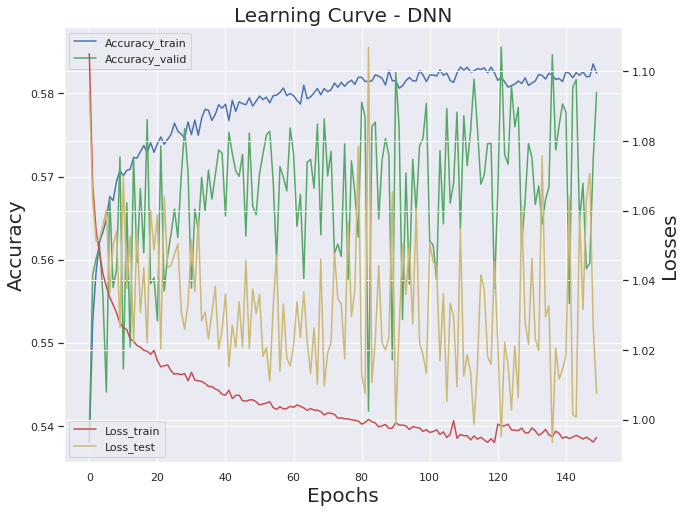

In [ ]:
history = pd.read_csv('/content/drive/Shareddrives/BNCS411_Final_Project/Group12_ANN_history.csv')

epochs = [i for i in range(150)]
figure = plt.figure(figsize=(10,8))
plt.title('Learning Curve - DNN', fontsize=20)
ax1 = figure.add_subplot(111)
ax1.plot(epochs, history['accuracy'],'b-', history['val_accuracy'], 'g-')
ax1.set_xlabel('Epochs', fontsize=20)
ax1.set_ylabel('Accuracy', fontsize=20)
ax1.legend(labels=('Accuracy_train', 'Accuracy_valid'))
ax2 = ax1.twinx()
ax2.plot(epochs, history['loss'], 'r-', history['val_loss'], 'y-')
ax2.set_ylabel('Losses', fontsize=20)
plt.legend(loc=3, labels=('Loss_train', 'Loss_test'))


In [ ]:
#y_month = pd.get_dummies(data_train['Scale'])
statelist = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG','MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RR', 'RS','SC', 'SE', 'SP', 'TO']
state_month_accuracy = pd.DataFrame(columns = statelist)
for j in statelist:
    temp = []
    for i in range(1, 13):
        month = data_test.loc[data['Month']==i]
        month = month[month['State']==j]
        score = ann.evaluate(month[['MaxTemp','MinTemp','RelHum', 'WindVel', 'Month', 'StateNr']], y.loc[month.index])
        print(f"State Code : {j}, Month : {i}, Result : {score} \n")
        temp.append(score[1])
    state_month_accuracy[j] = temp

1/1 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9677
State Code : AC, Month : 1, Result : [0.16725358366966248, 0.9677419066429138] 

1/1 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 1.0000
State Code : AC, Month : 2, Result : [0.030306711792945862, 1.0] 

1/1 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 1.0000
State Code : AC, Month : 3, Result : [0.04209582880139351, 1.0] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8333
State Code : AC, Month : 4, Result : [0.4768848717212677, 0.8333333134651184] 

1/1 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.7419
State Code : AC, Month : 5, Result : [0.7629222869873047, 0.7419354915618896] 

1/1 [==============================] - 0s 1ms/step - loss: 1.1418 - accuracy: 0.5667
State Code : AC, Month : 6, Result : [1.1417503356933594, 0.5666666626930237] 

1/1 [==============================]

In [ ]:
np.array(state_month_accuracy).mean()

0.5790777950046154

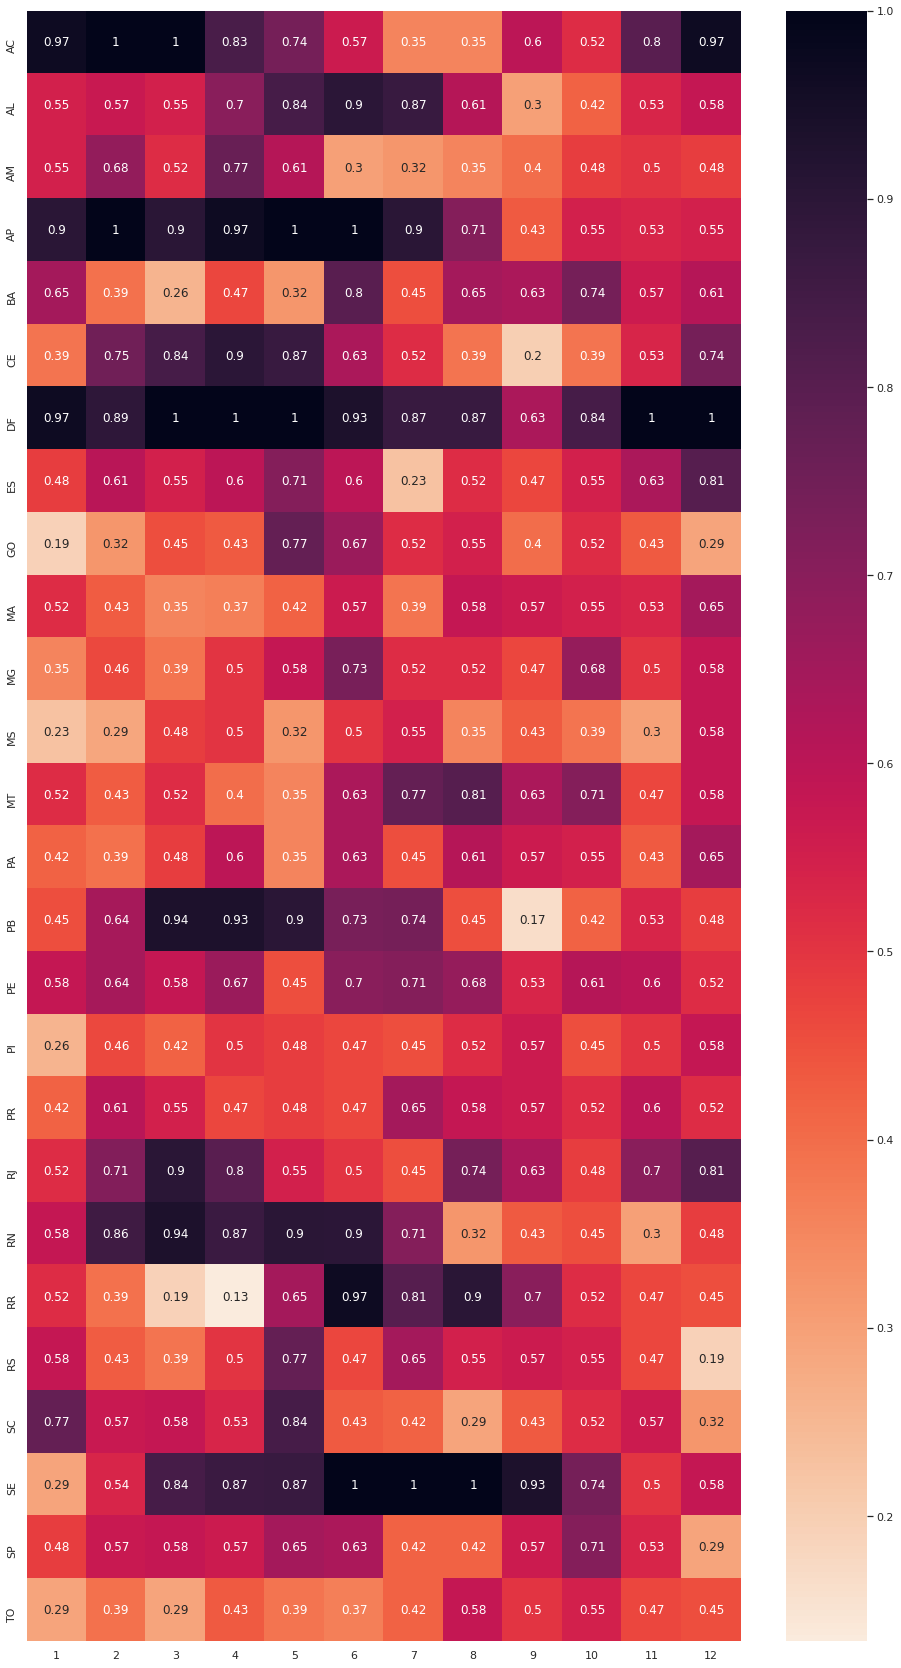

In [ ]:
sns.set(rc={'figure.figsize':(16,30)})
ax = sns.heatmap( state_month_accuracy.T, annot=True, xticklabels=[i for i in range(1,13)], cmap = sns.cm.rocket_r)

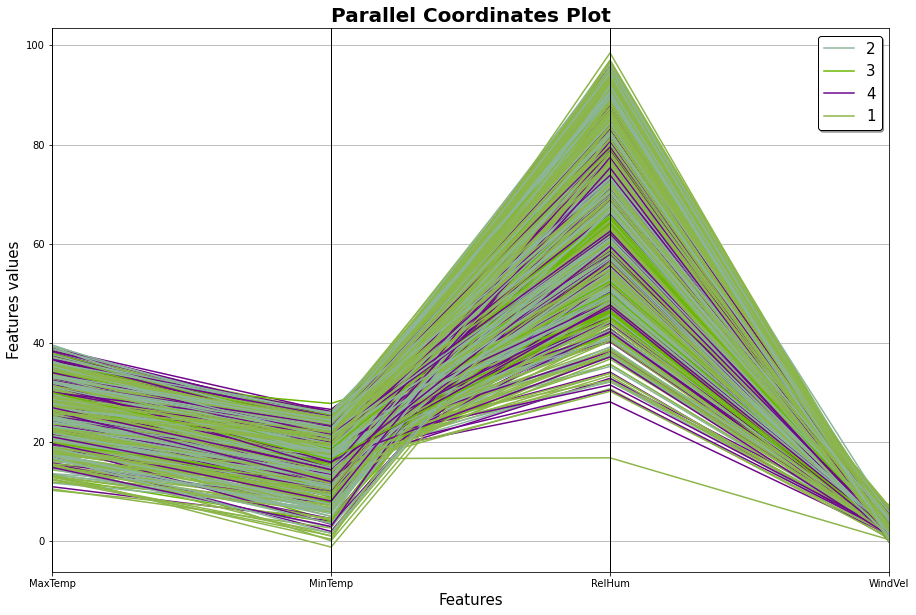

In [ ]:
plt.figure(figsize=(15,10))
parallel_coordinates(data.drop(["Date","State","Fires","StateNr","Month","FirPrev"], axis=1), "Scale")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

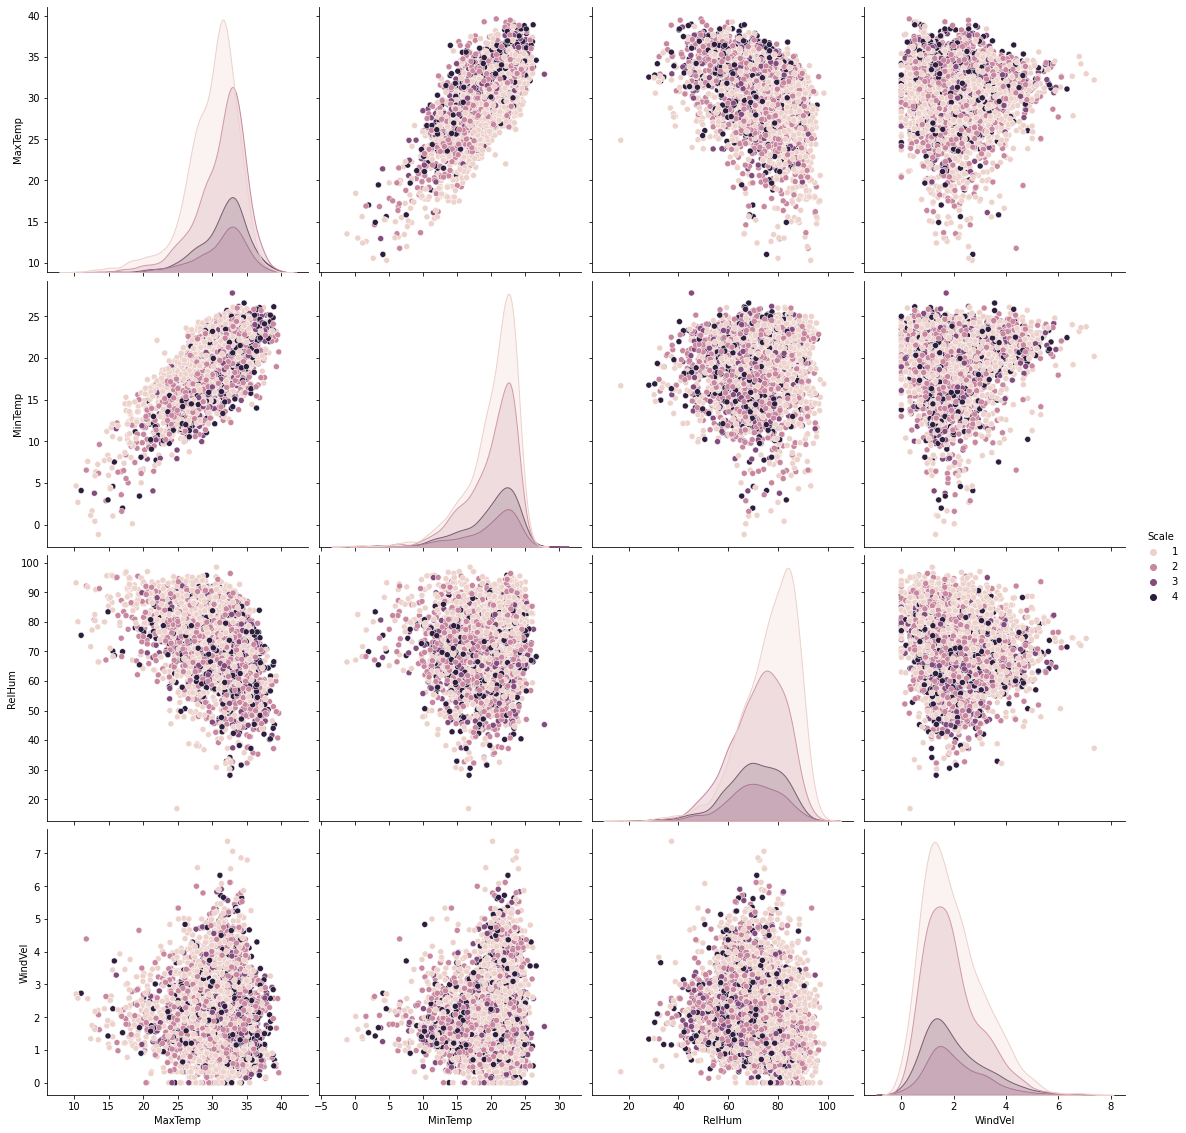

In [ ]:
plt.figure()
sns.pairplot(data.drop(["Date","State","Fires","StateNr","Month","FirPrev"], axis=1), hue = "Scale", size=4)
plt.show()

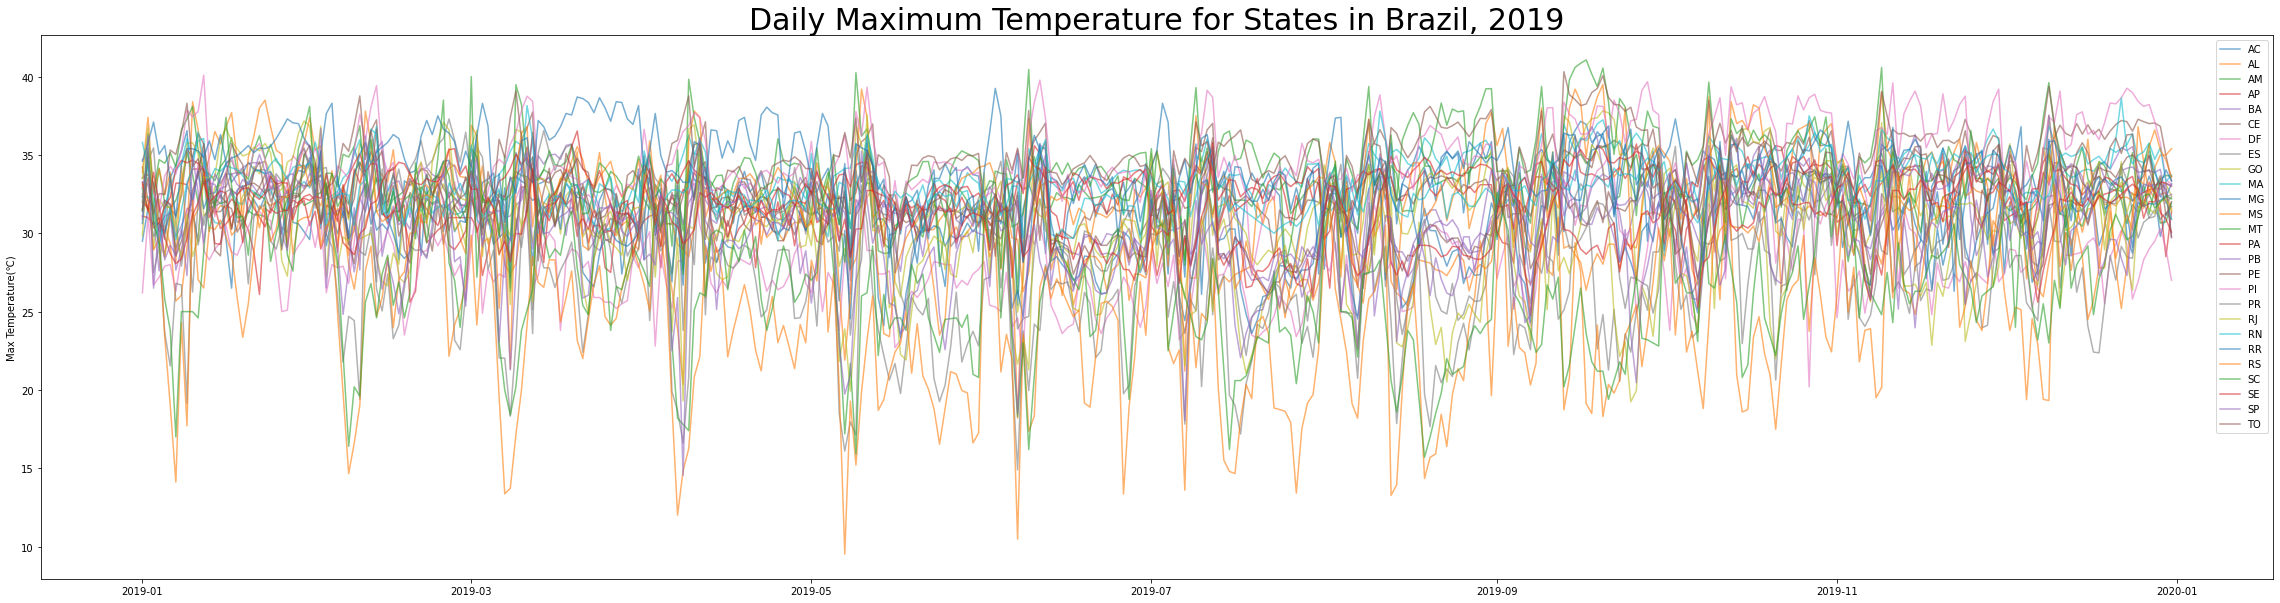

In [ ]:

ax = plt.figure(figsize=(40,10))
for i in statelist:
    plt.plot(data_test['Date'].unique() ,data_test['MaxTemp'].loc[data_test['State']==i], alpha=0.6, label=i)
plt.legend(loc=1)
plt.title('Daily Maximum Temperature for States in Brazil, 2019', fontsize=30)
plt.ylabel('Max Temperature(℃)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.show()
ax.savefig('/content/drive/Shareddrives/BNCS411_Final_Project/MaxTemp_2019.pdf')

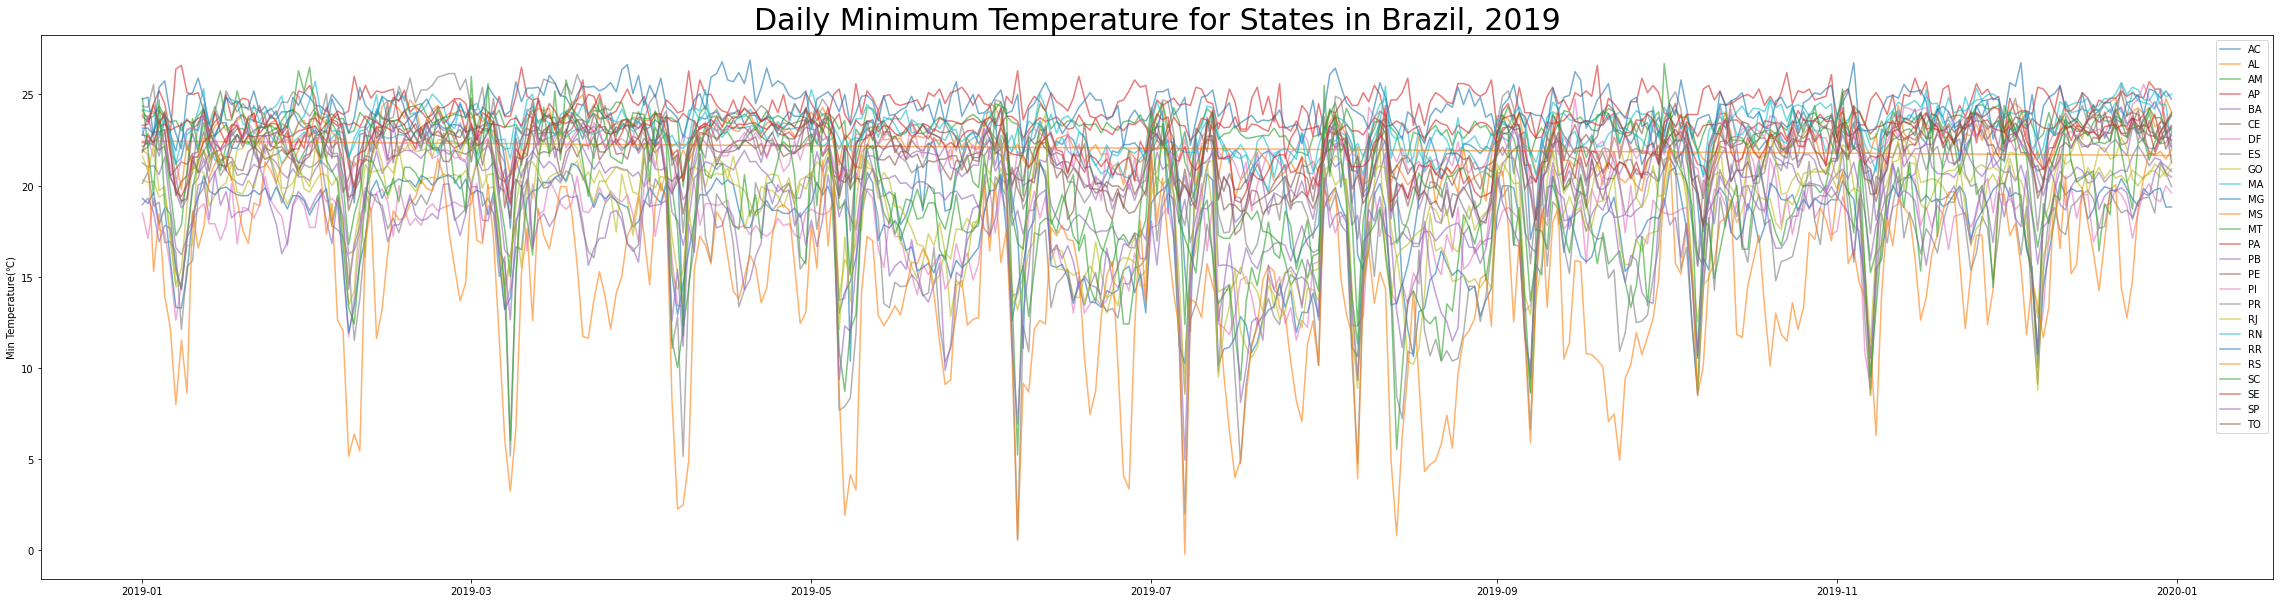

In [ ]:

ax = plt.figure(figsize=(40,10))
for i in statelist:
    plt.plot(data_test['Date'].unique() ,data_test['MinTemp'].loc[data_test['State']==i], alpha=0.6, label=i)
plt.legend(loc=1)
plt.title('Daily Minimum Temperature for States in Brazil, 2019', fontsize=30)
plt.ylabel('Min Temperature(℃)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.show()
ax.savefig('/content/drive/Shareddrives/BNCS411_Final_Project/MinTemp_2019.pdf')

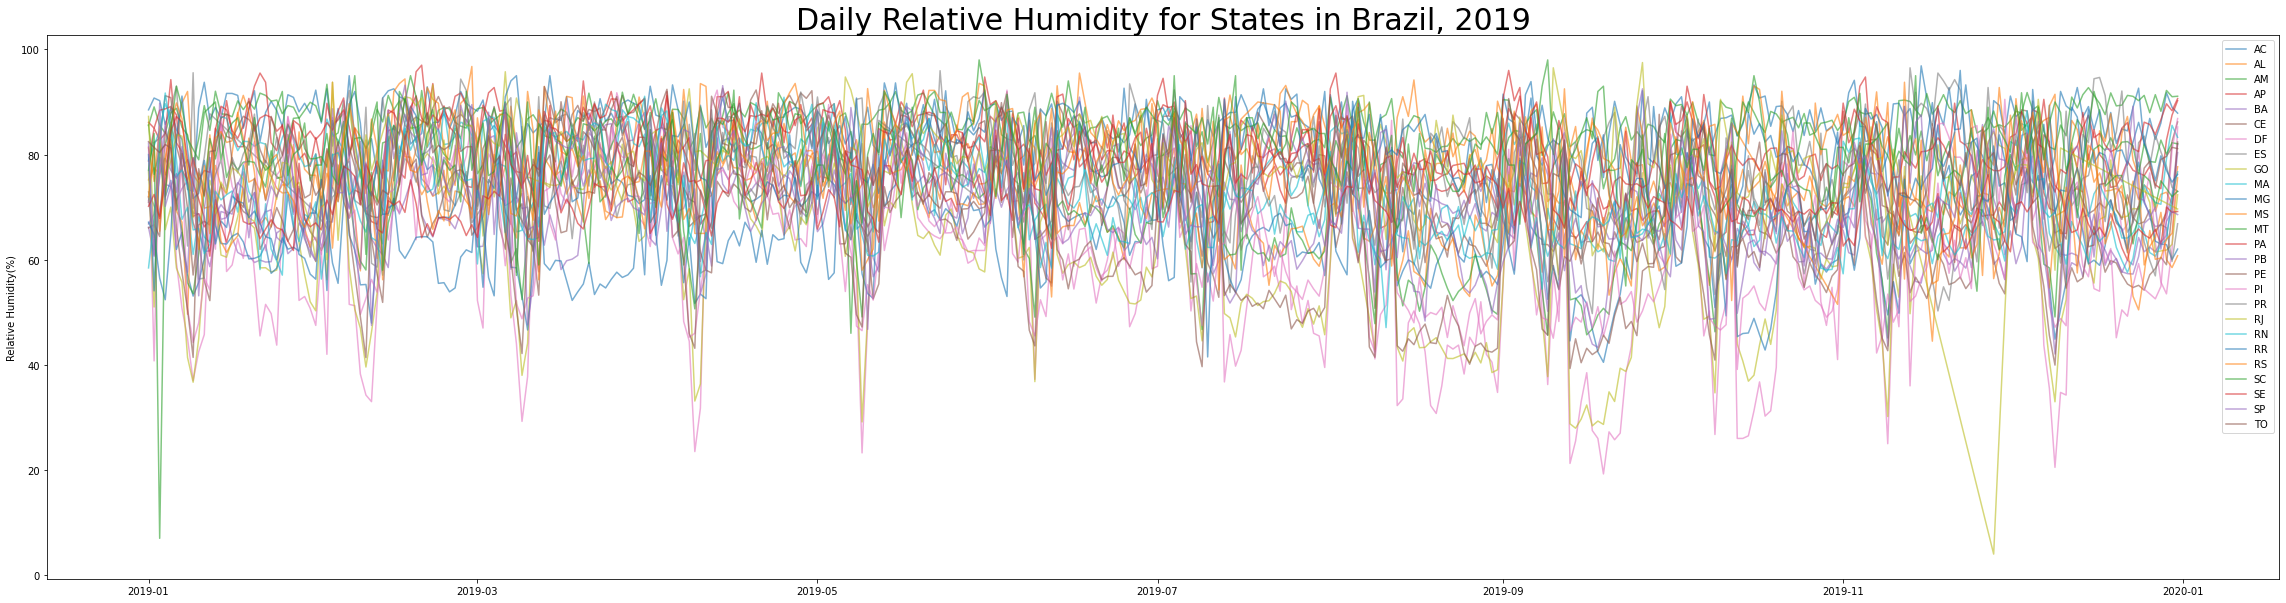

In [ ]:

ax = plt.figure(figsize=(40,10))
for i in statelist:
    plt.plot(data_test['Date'].unique() ,data_test['RelHum'].loc[data_test['State']==i], alpha=0.6, label=i)
plt.legend(loc=1)
plt.title('Daily Relative Humidity for States in Brazil, 2019', fontsize=30)
plt.ylabel('Relative Humidity(%)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.show()
ax.savefig('/content/drive/Shareddrives/BNCS411_Final_Project/RelHum_2019.pdf')

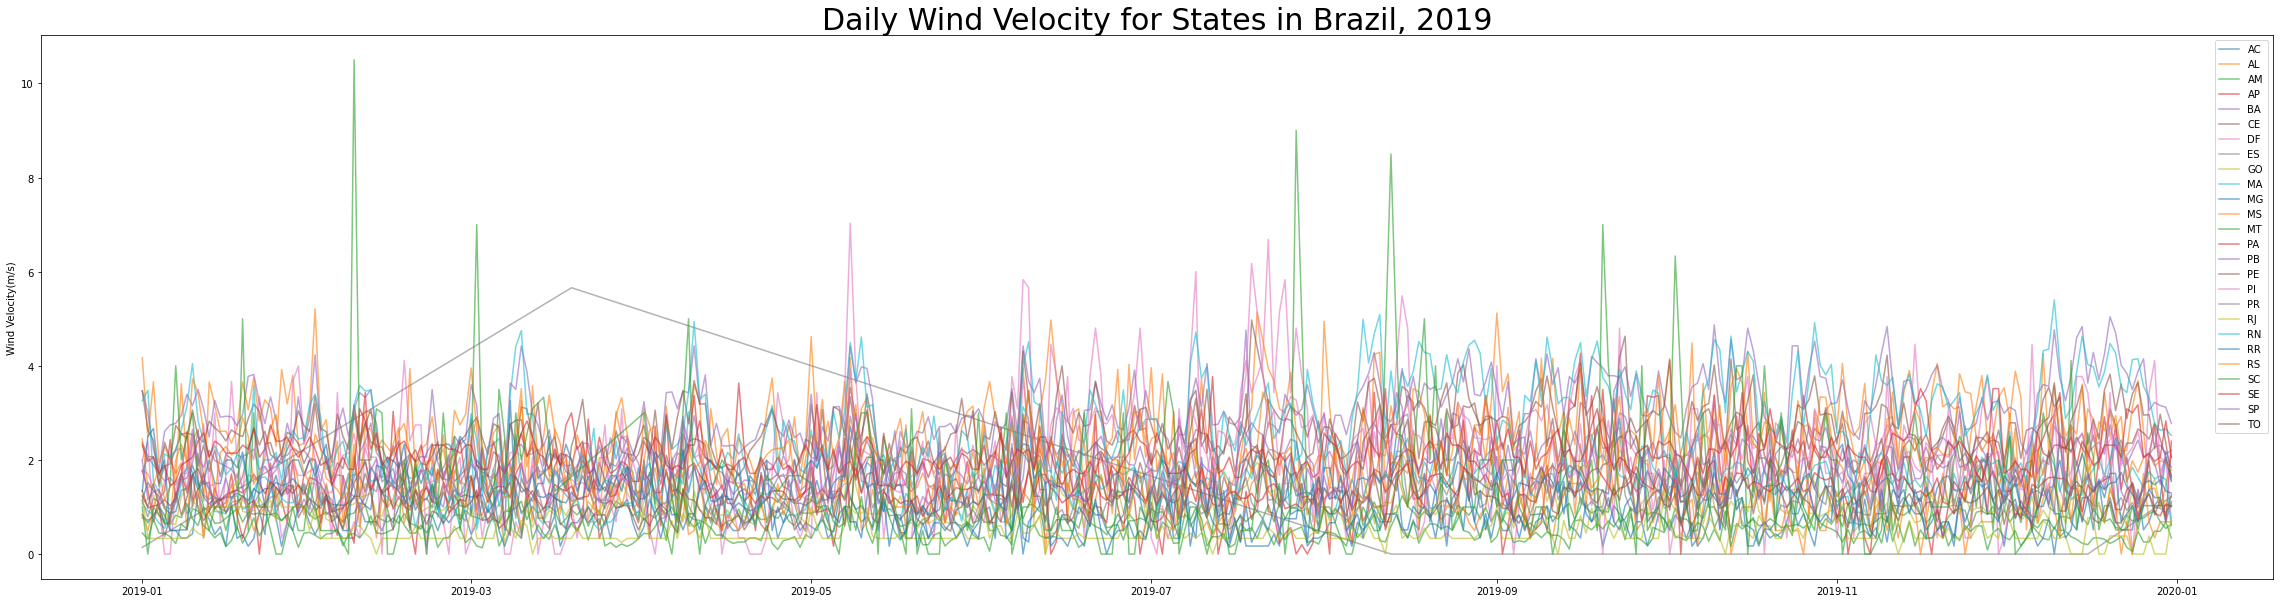

In [ ]:

ax = plt.figure(figsize=(40,10))
for i in statelist:
    plt.plot(data_test['Date'].unique() ,data_test['WindVel'].loc[data_test['State']==i], alpha=0.6, label=i)
plt.legend(loc=1)
plt.title('Daily Wind Velocity for States in Brazil, 2019', fontsize=30)
plt.ylabel('Wind Velocity(m/s)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.show()
ax.savefig('/content/drive/Shareddrives/BNCS411_Final_Project/WindVel_2019.pdf')

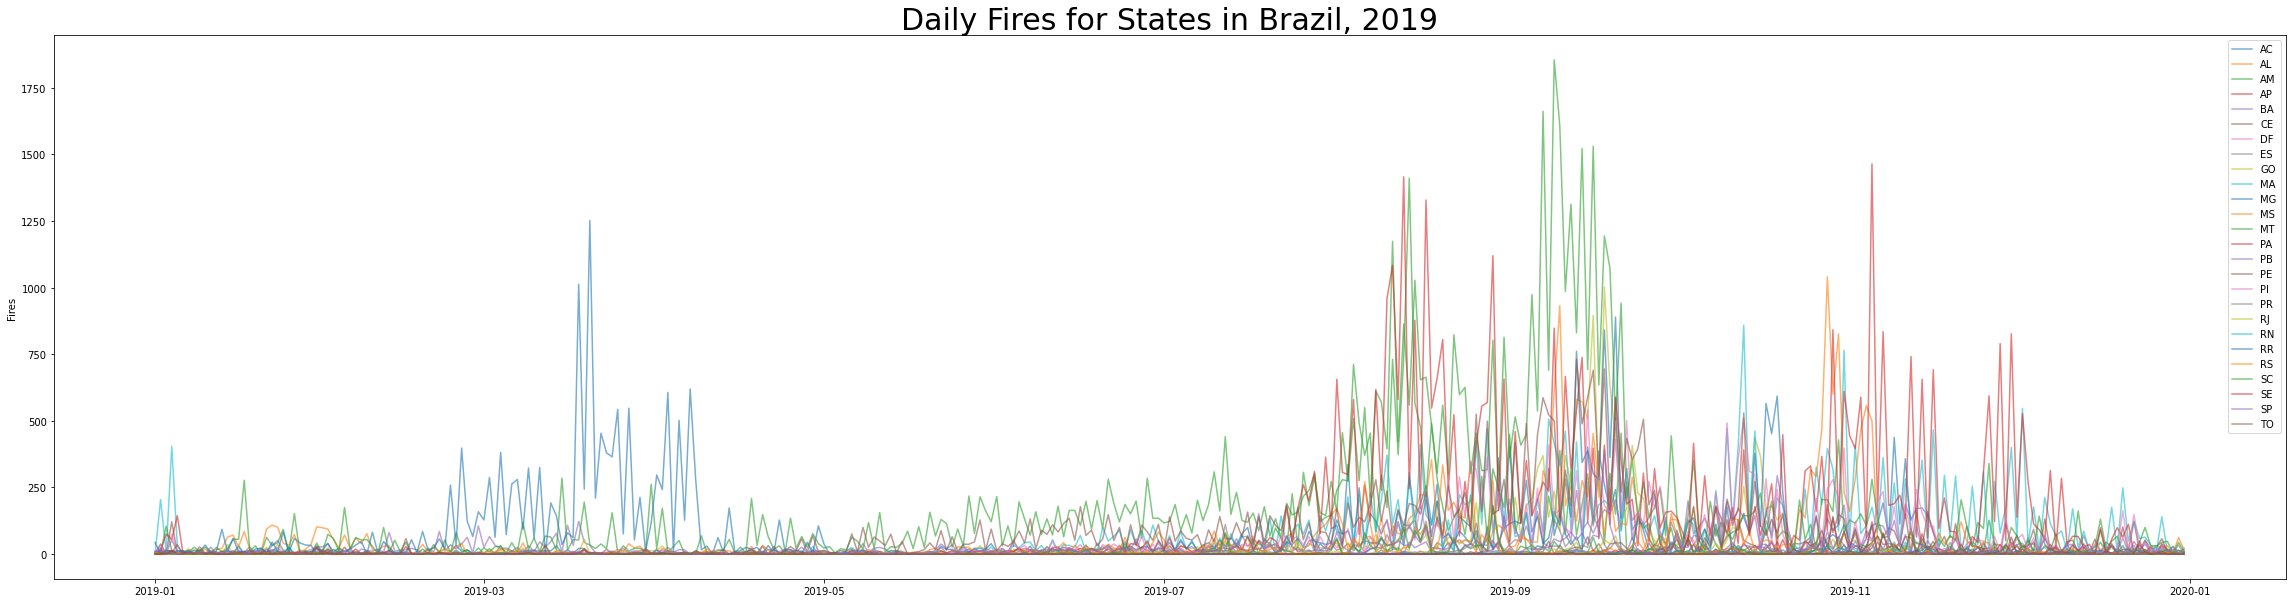

In [ ]:
ax = plt.figure(figsize=(40,10))
for i in statelist:
    plt.plot(data_test['Date'].unique() ,data_test['Fires'].loc[data_test['State']==i], alpha=0.6, label=i)
plt.legend(loc=1)
plt.title('Daily Fires for States in Brazil, 2019', fontsize=30)
plt.ylabel('Fires')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.show()
ax.savefig('/content/drive/Shareddrives/BNCS411_Final_Project/Fires_2019.pdf')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

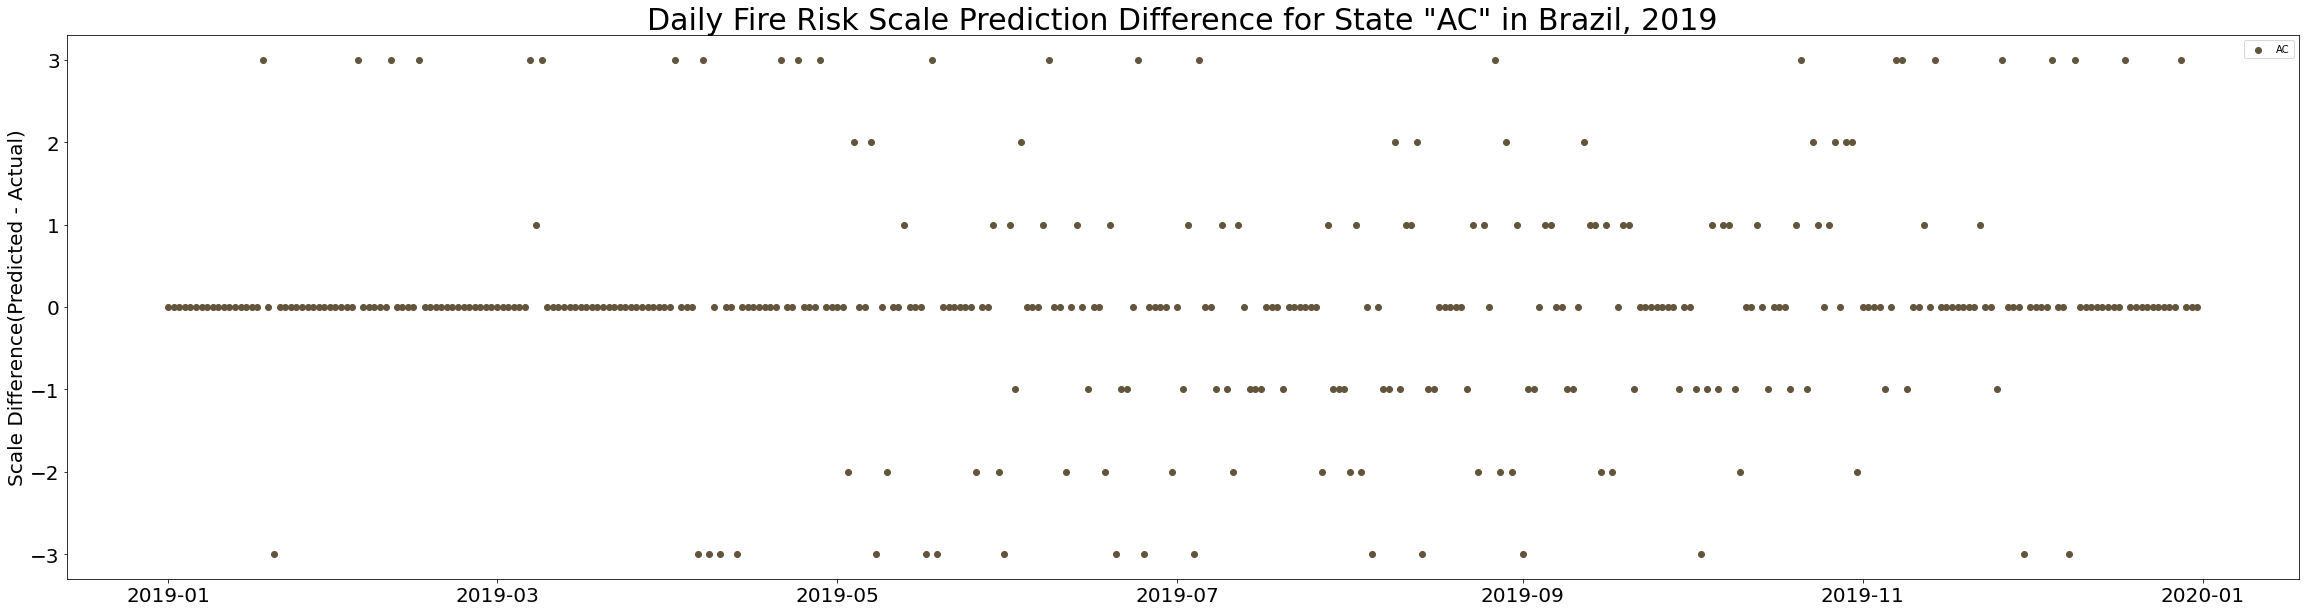

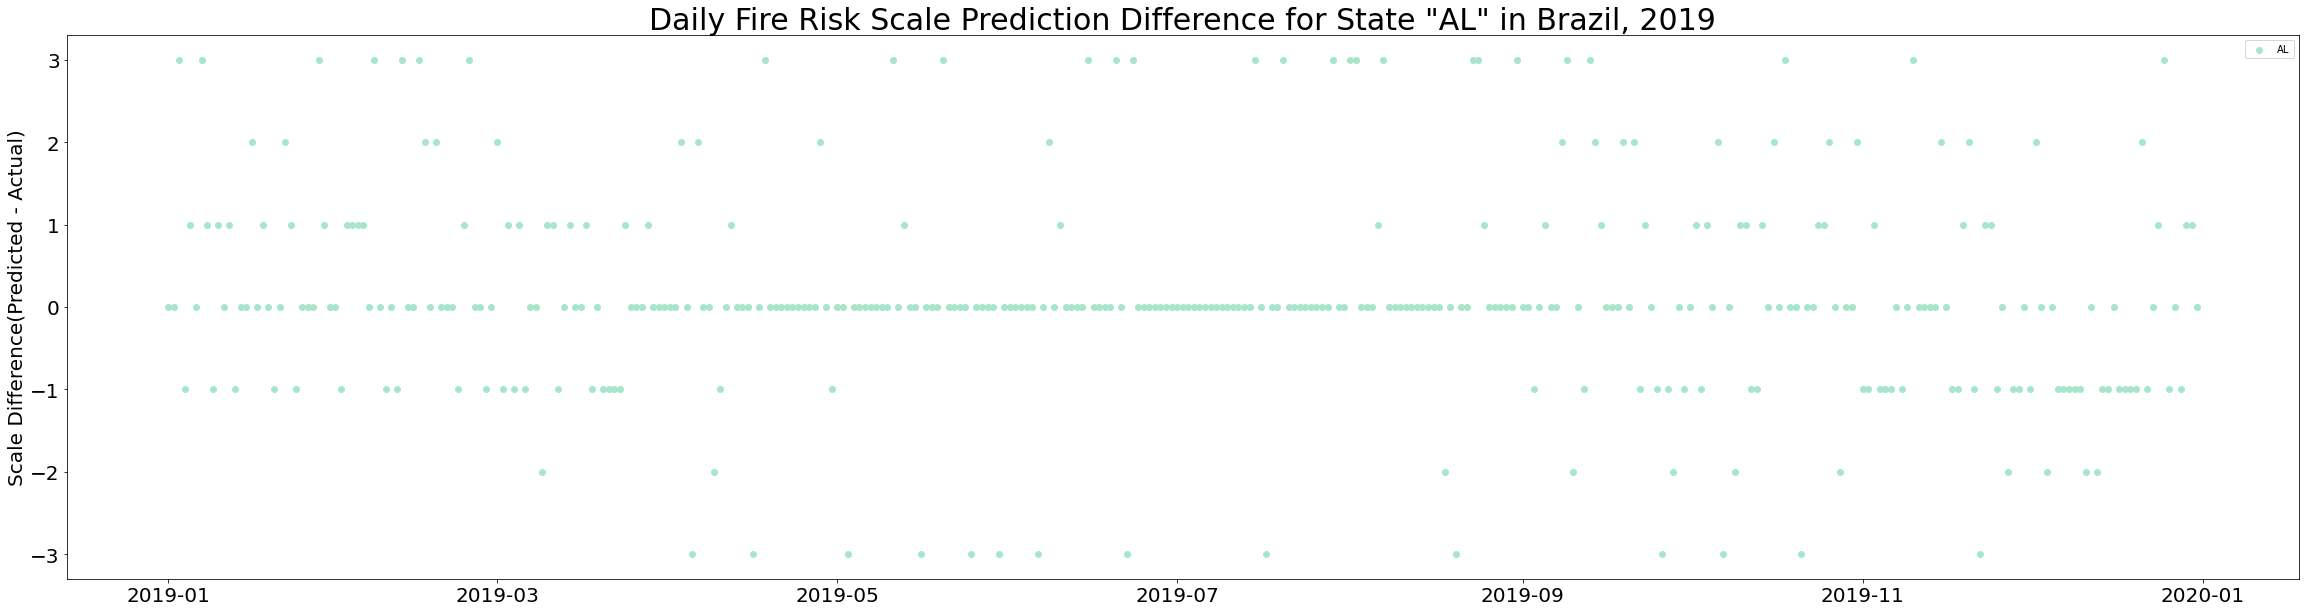

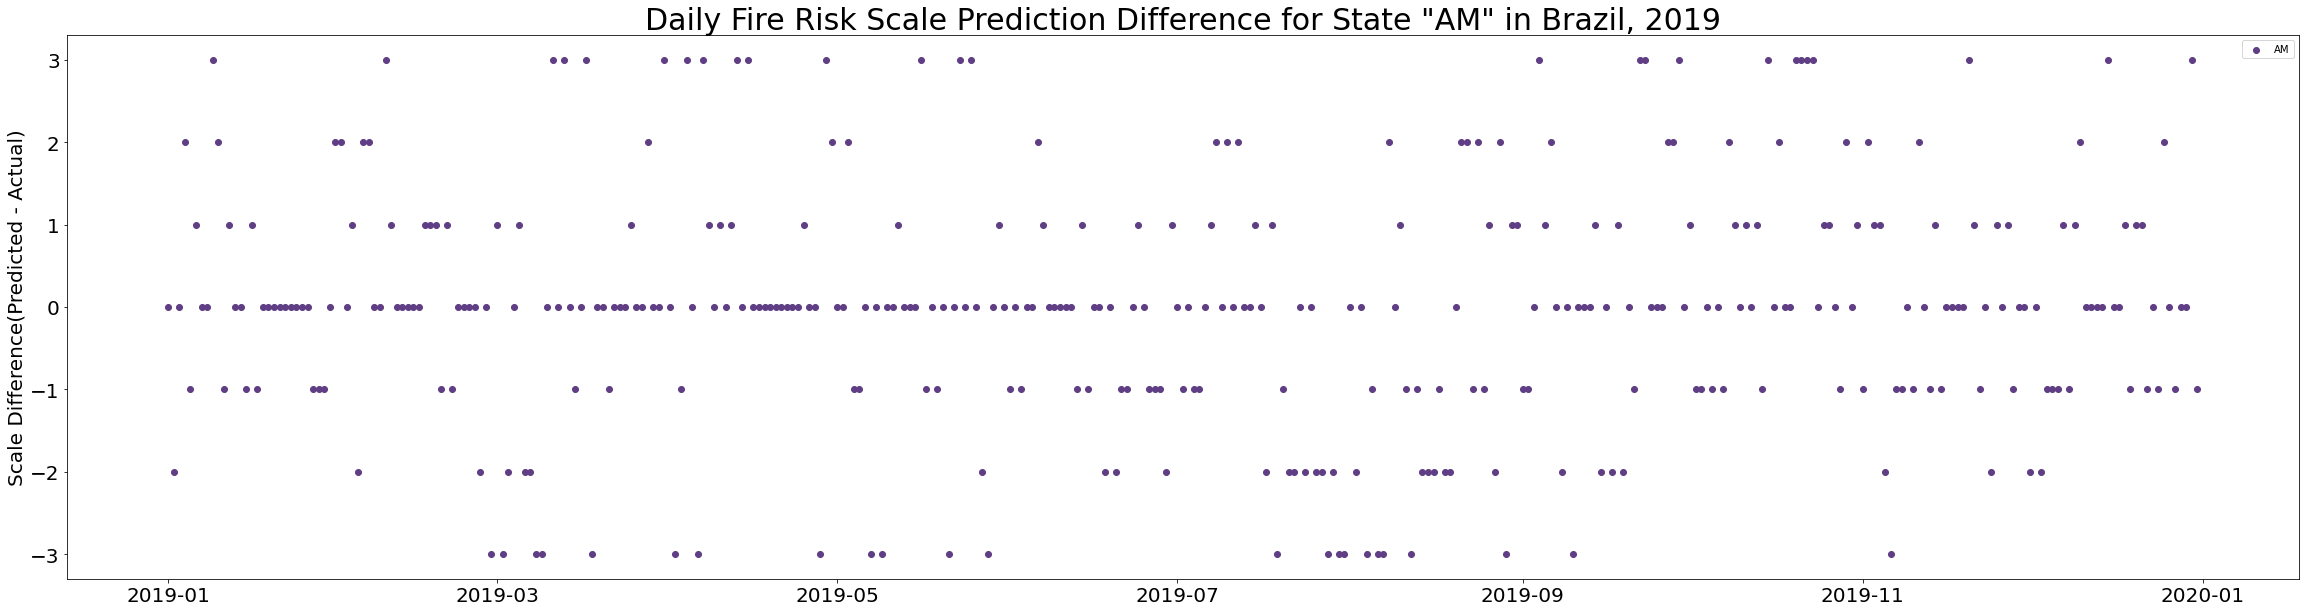

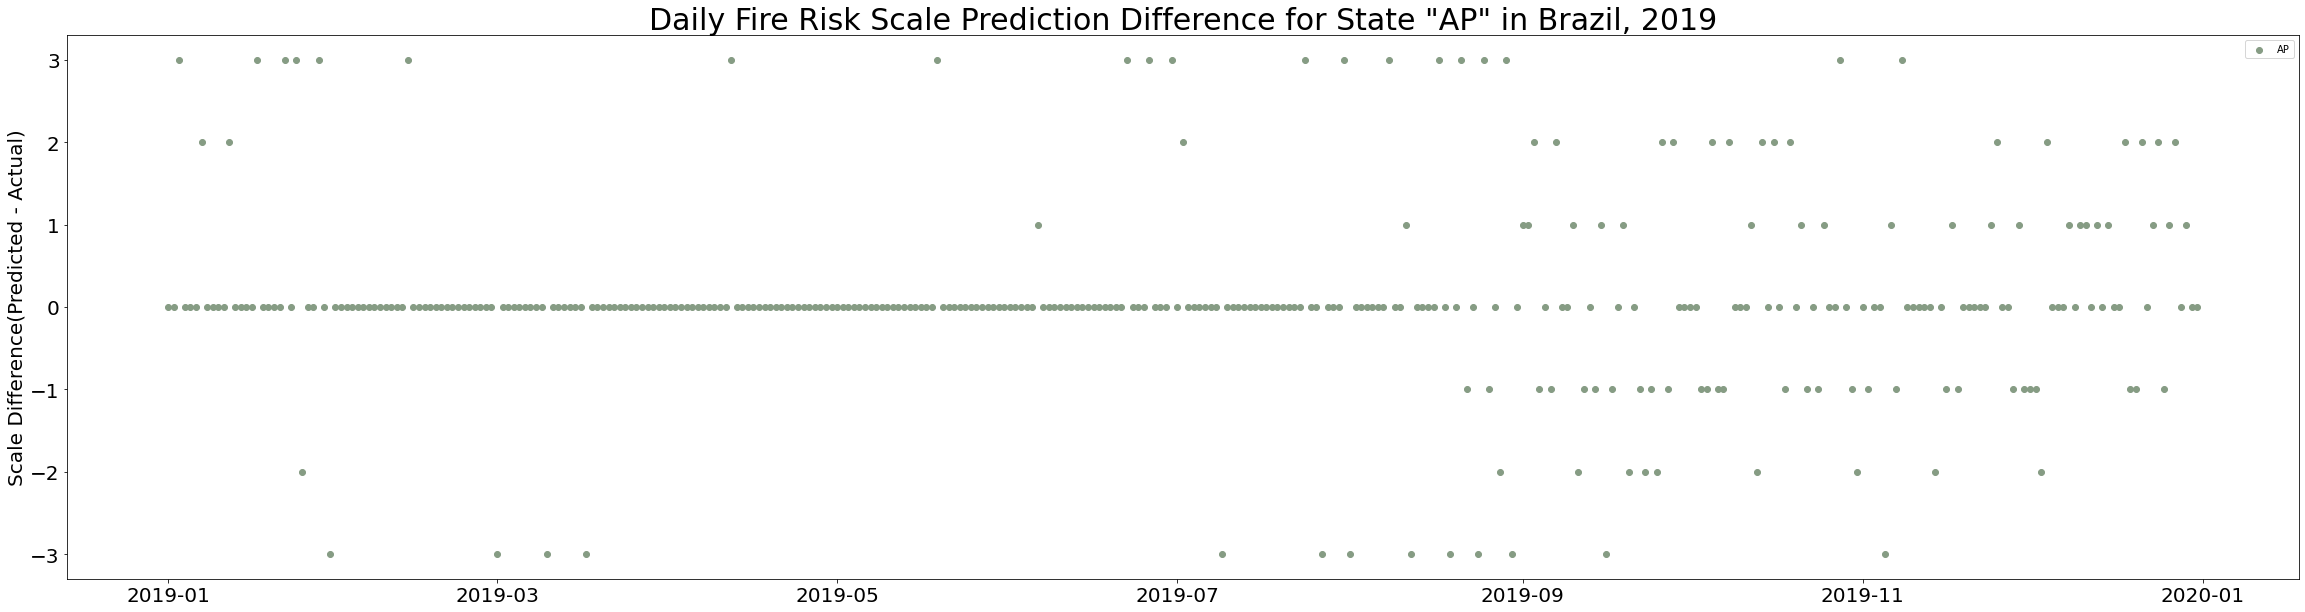

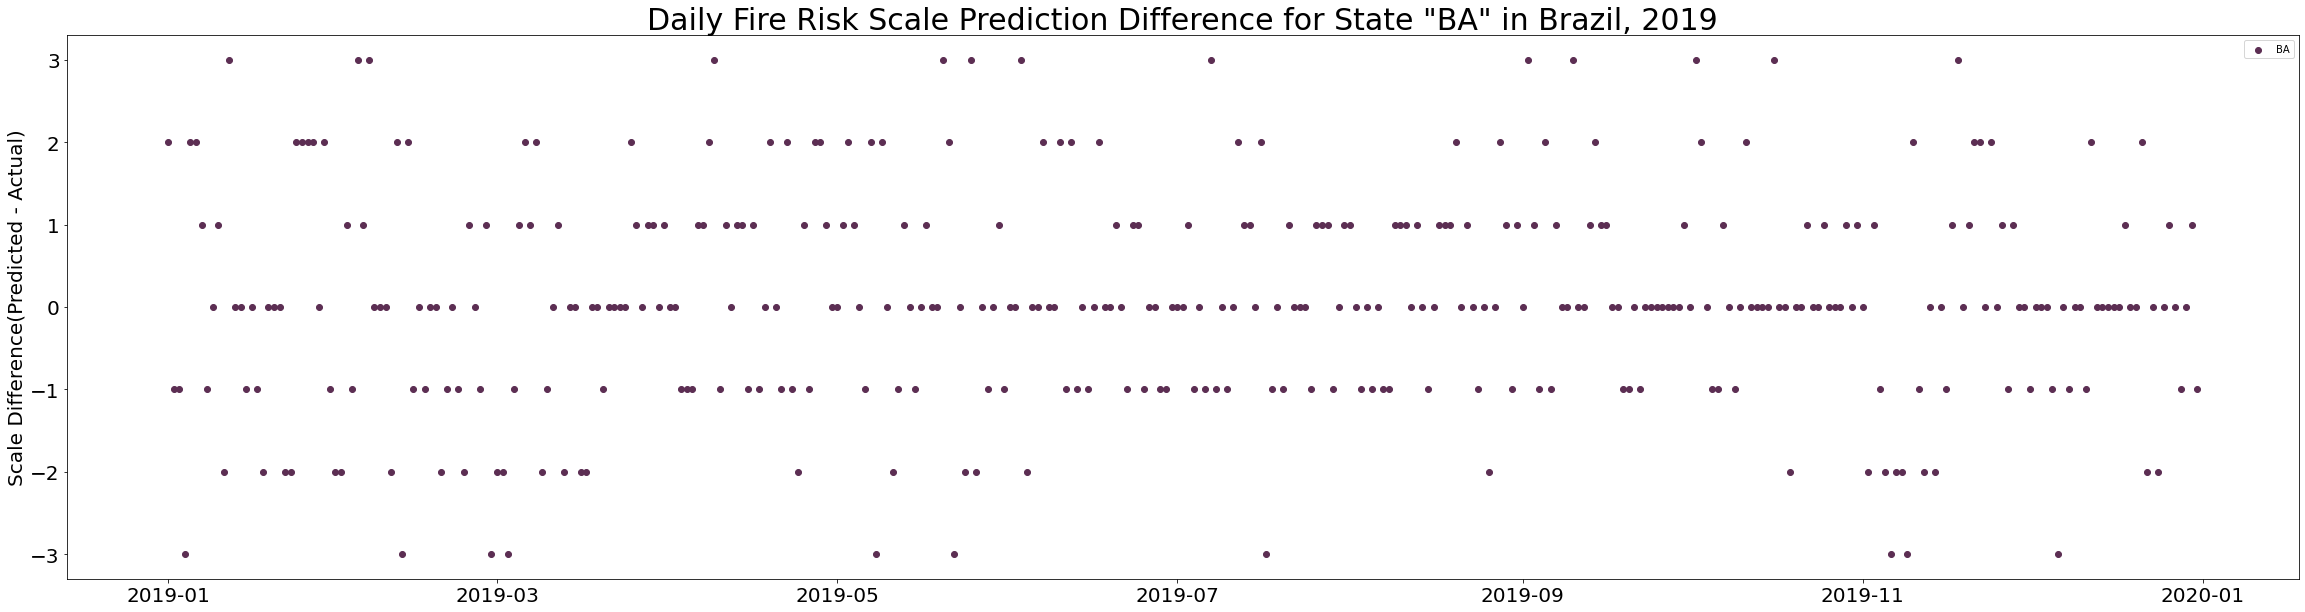

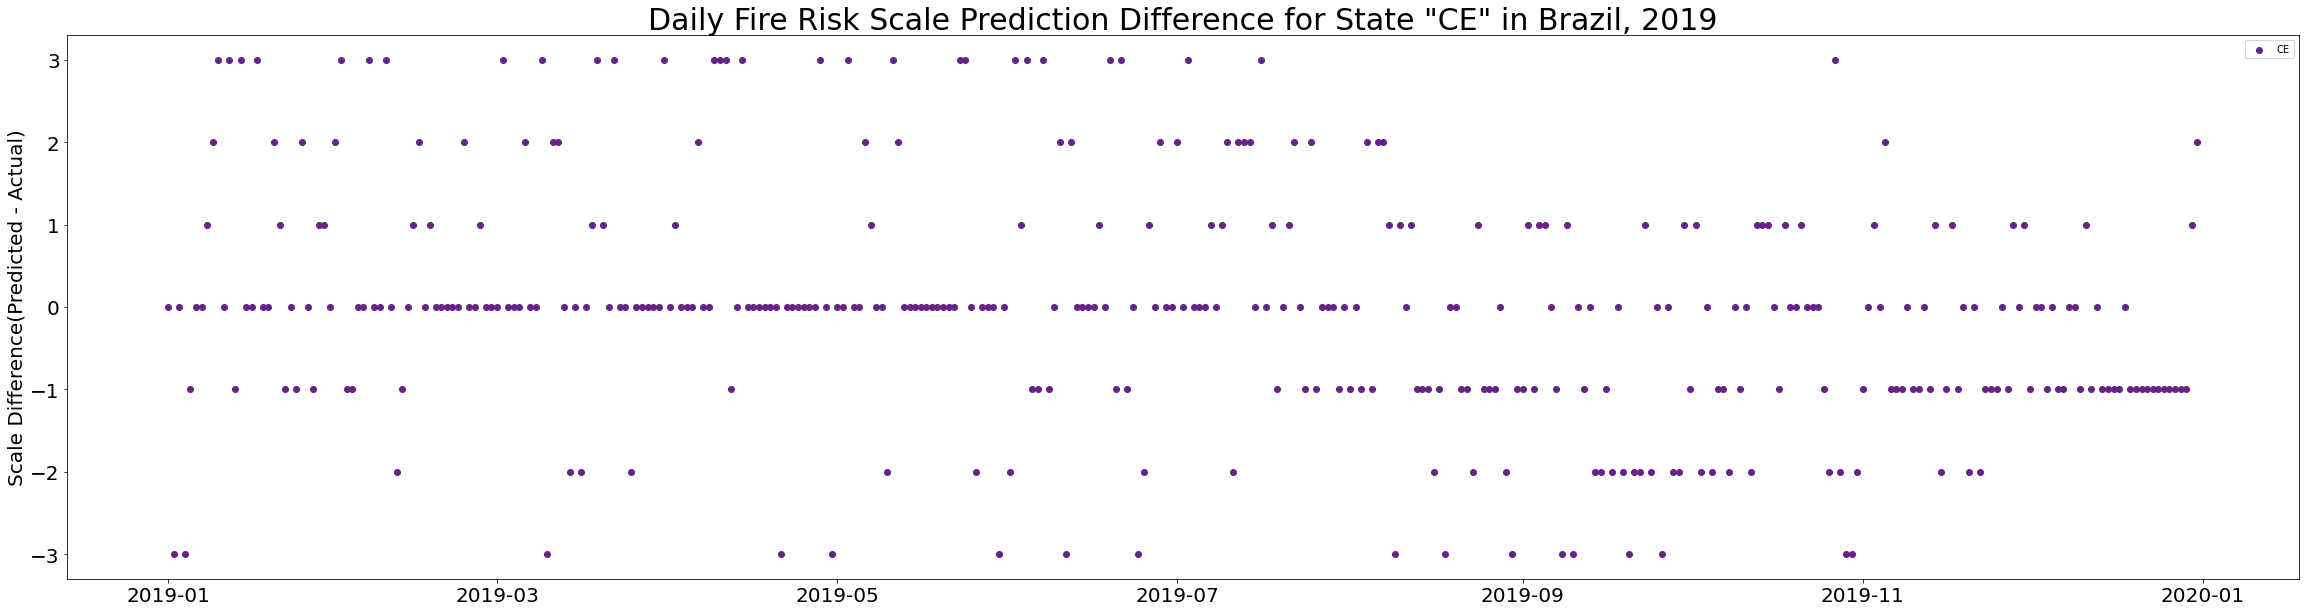

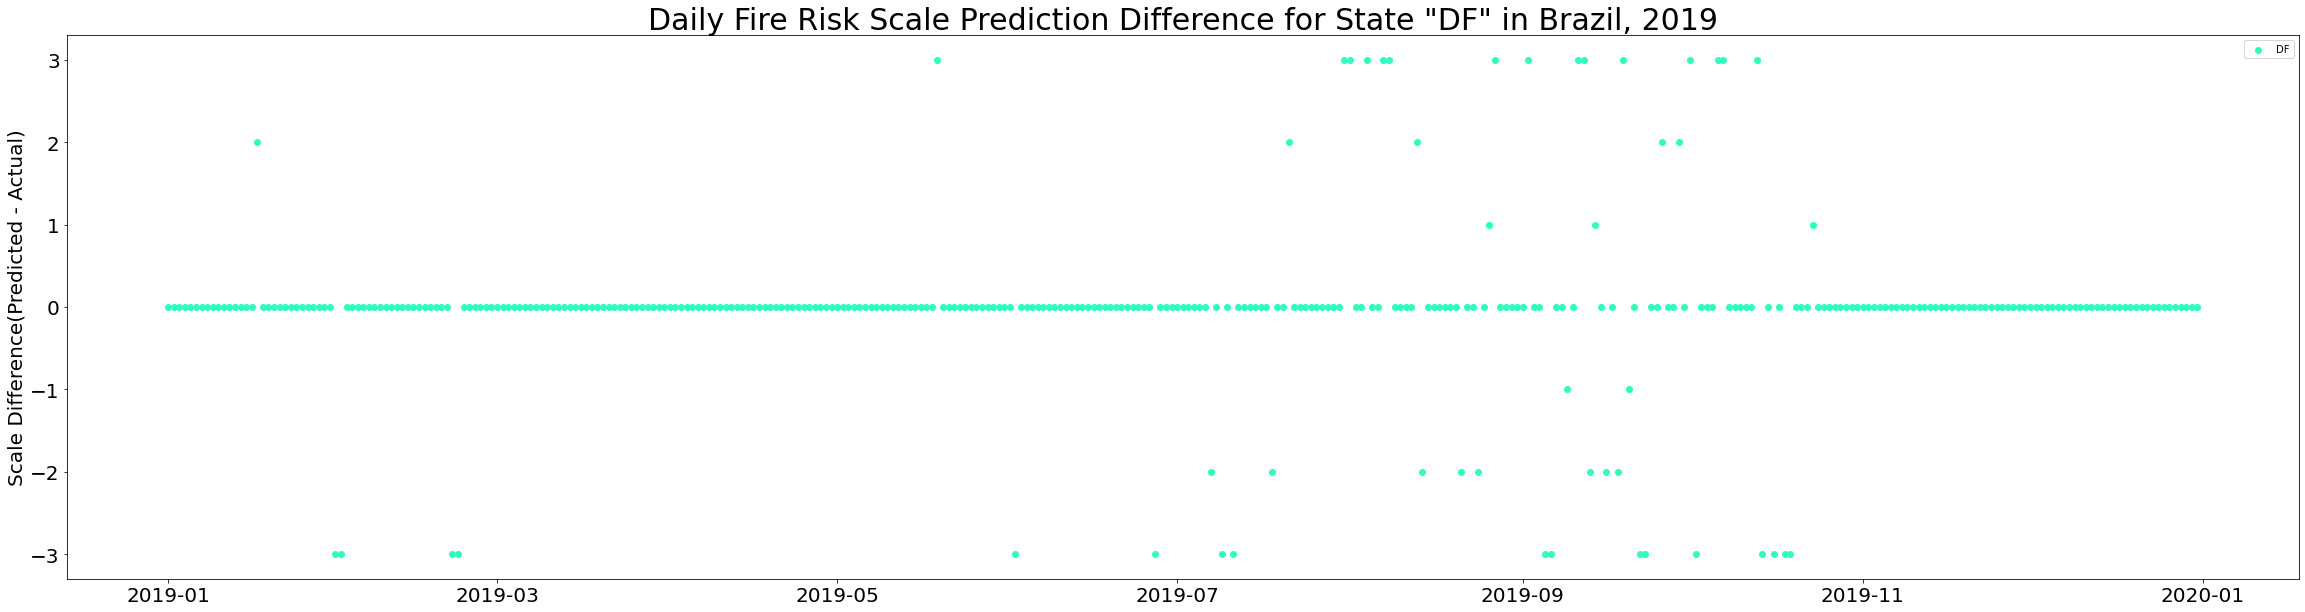

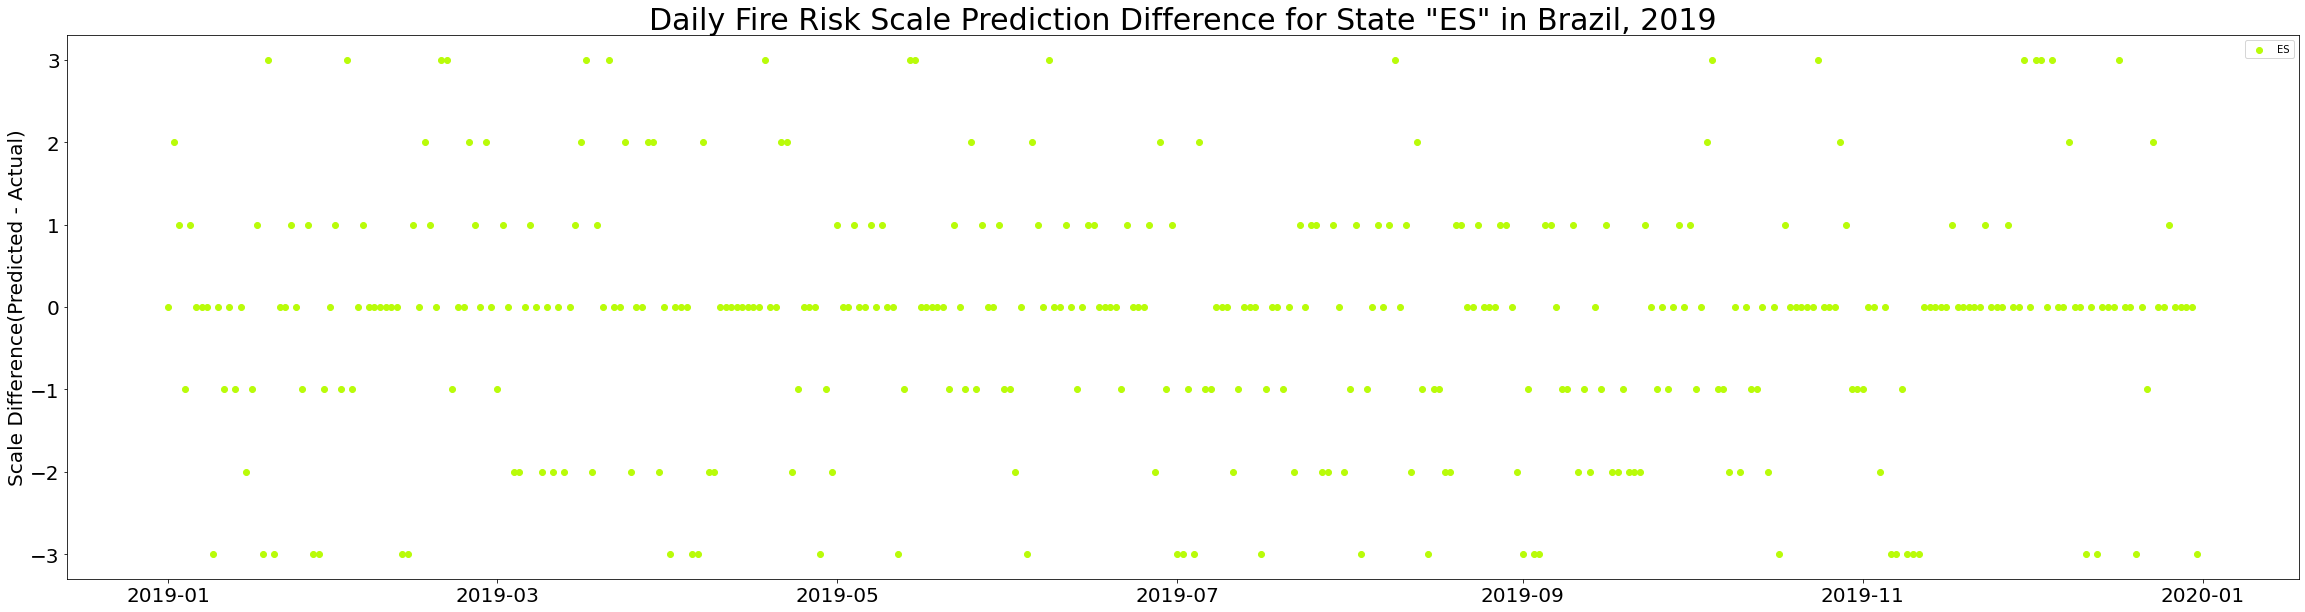

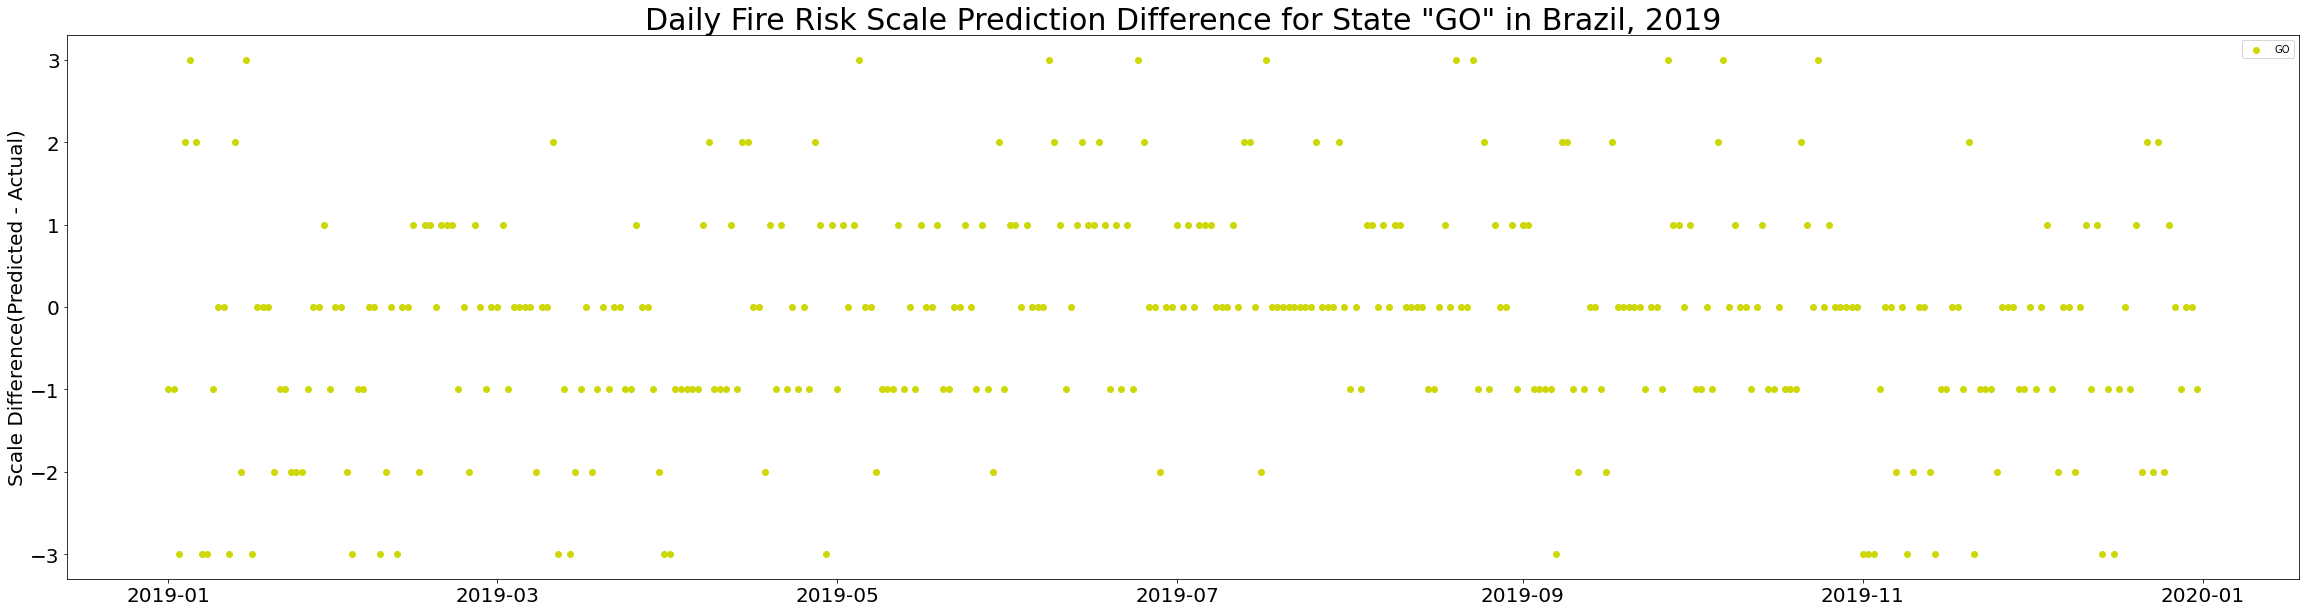

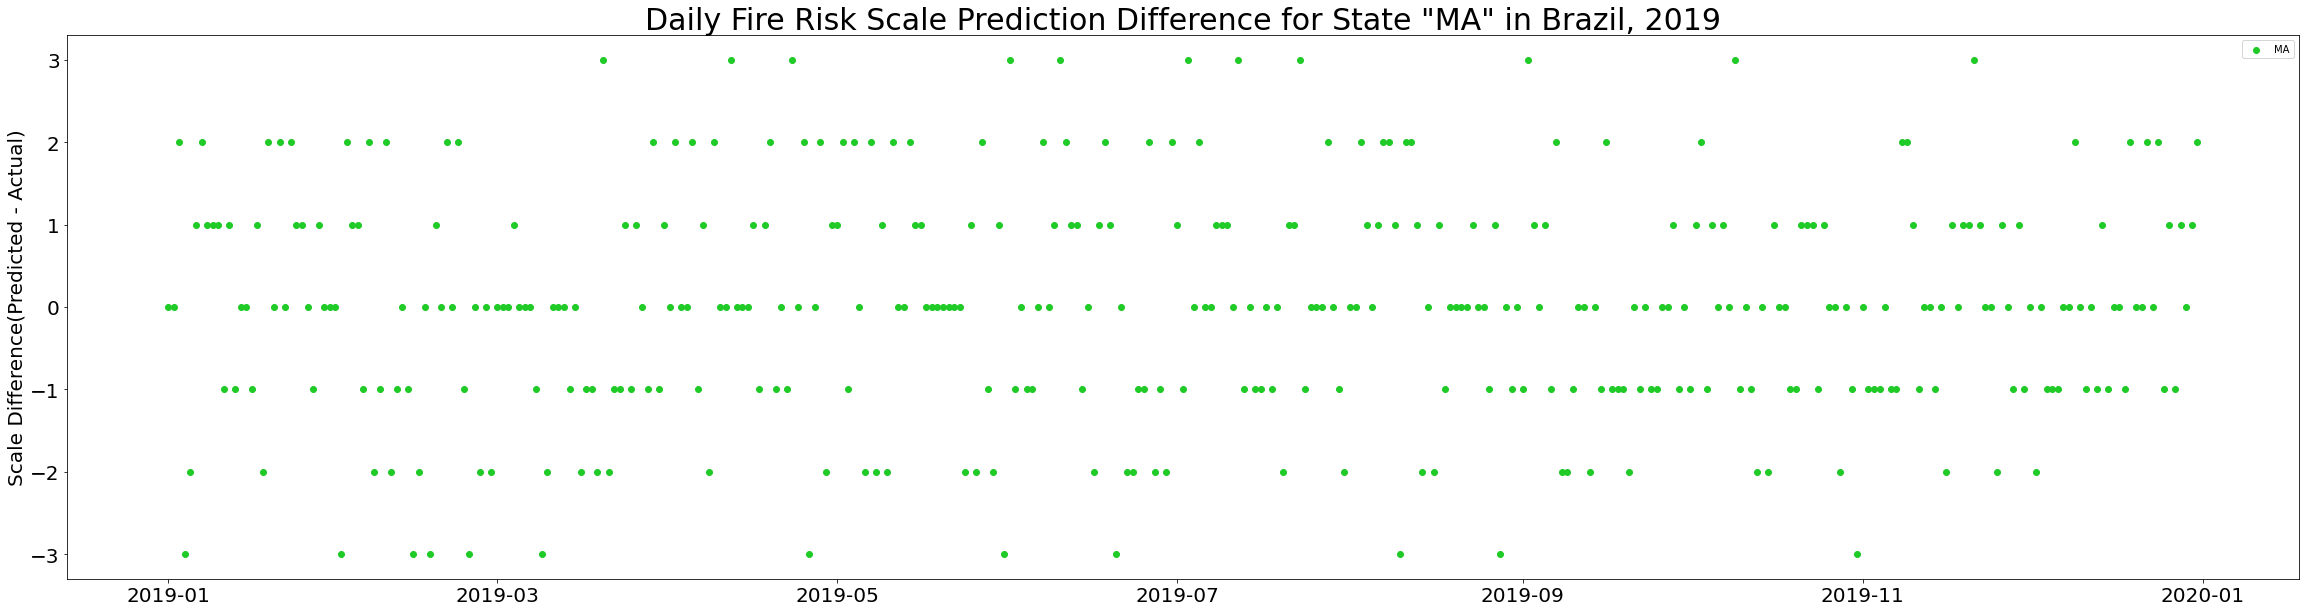

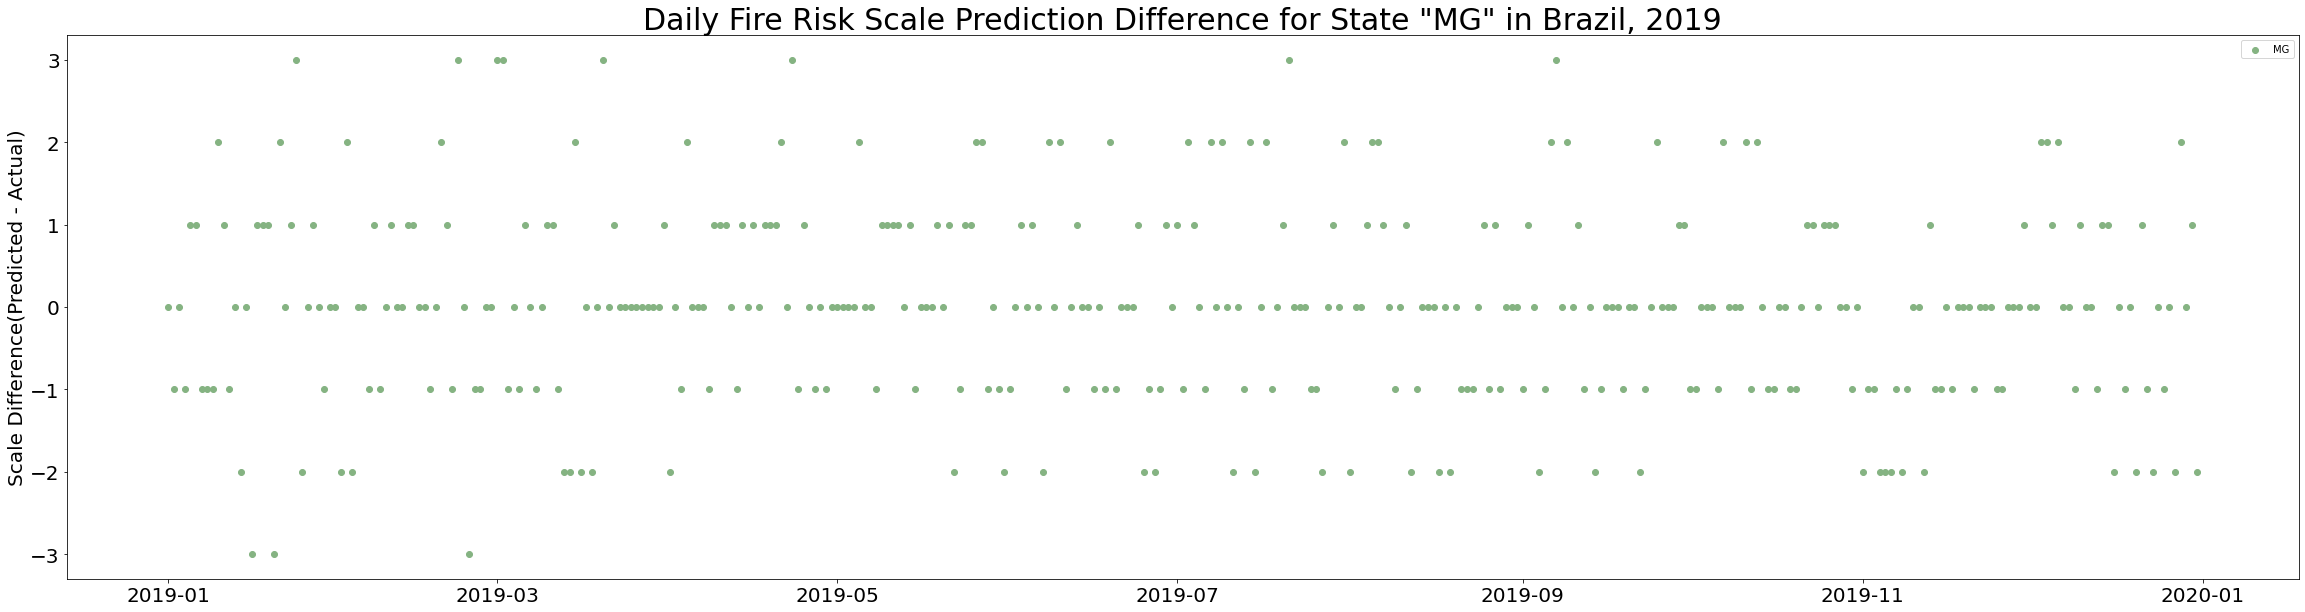

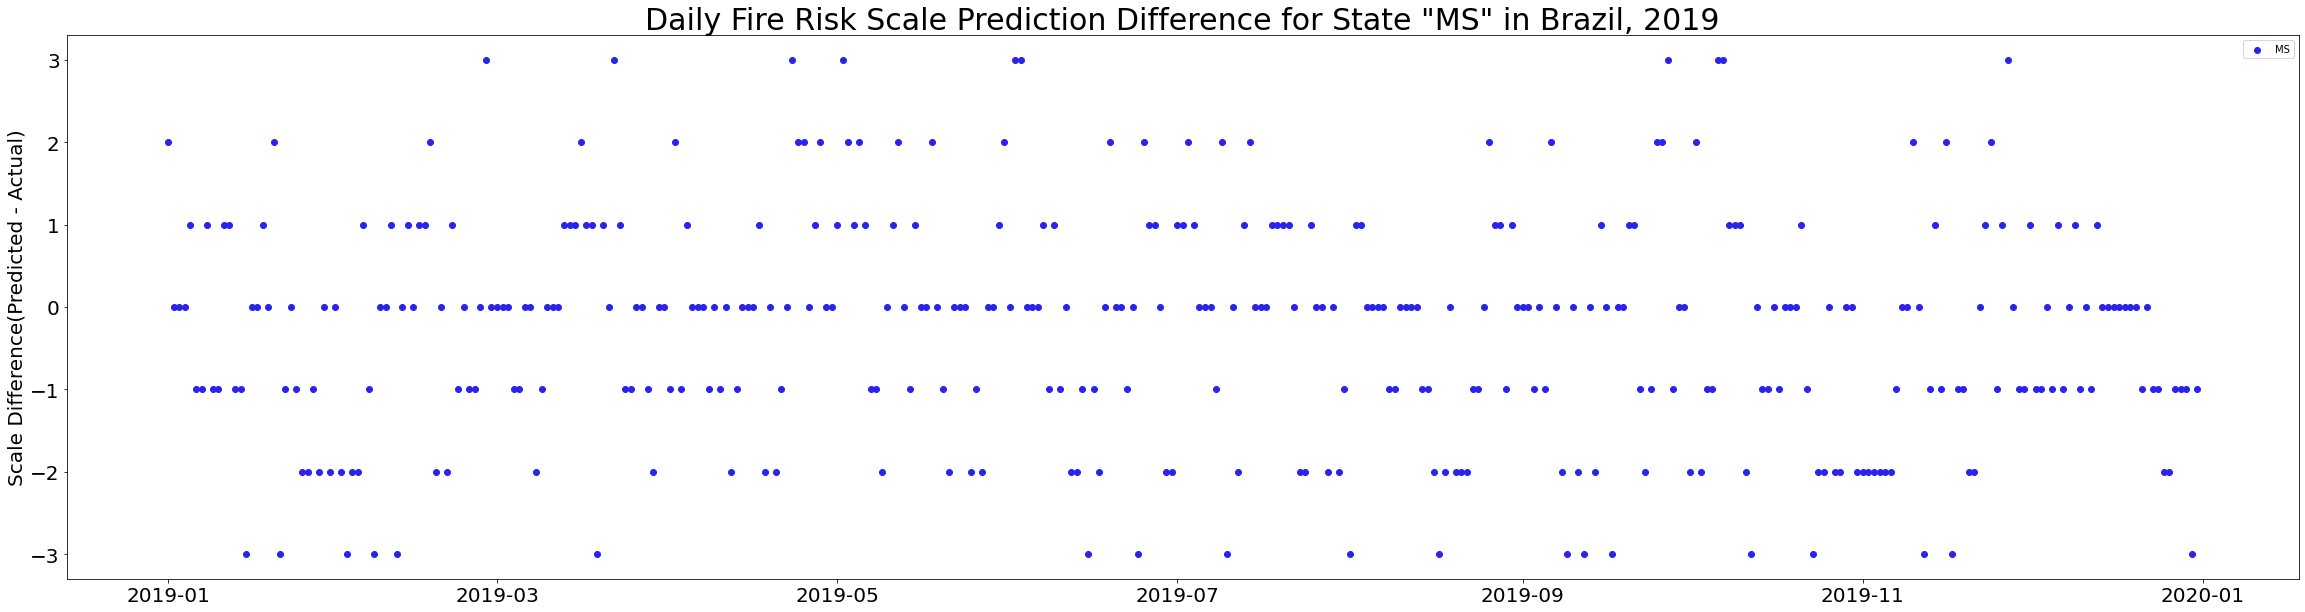

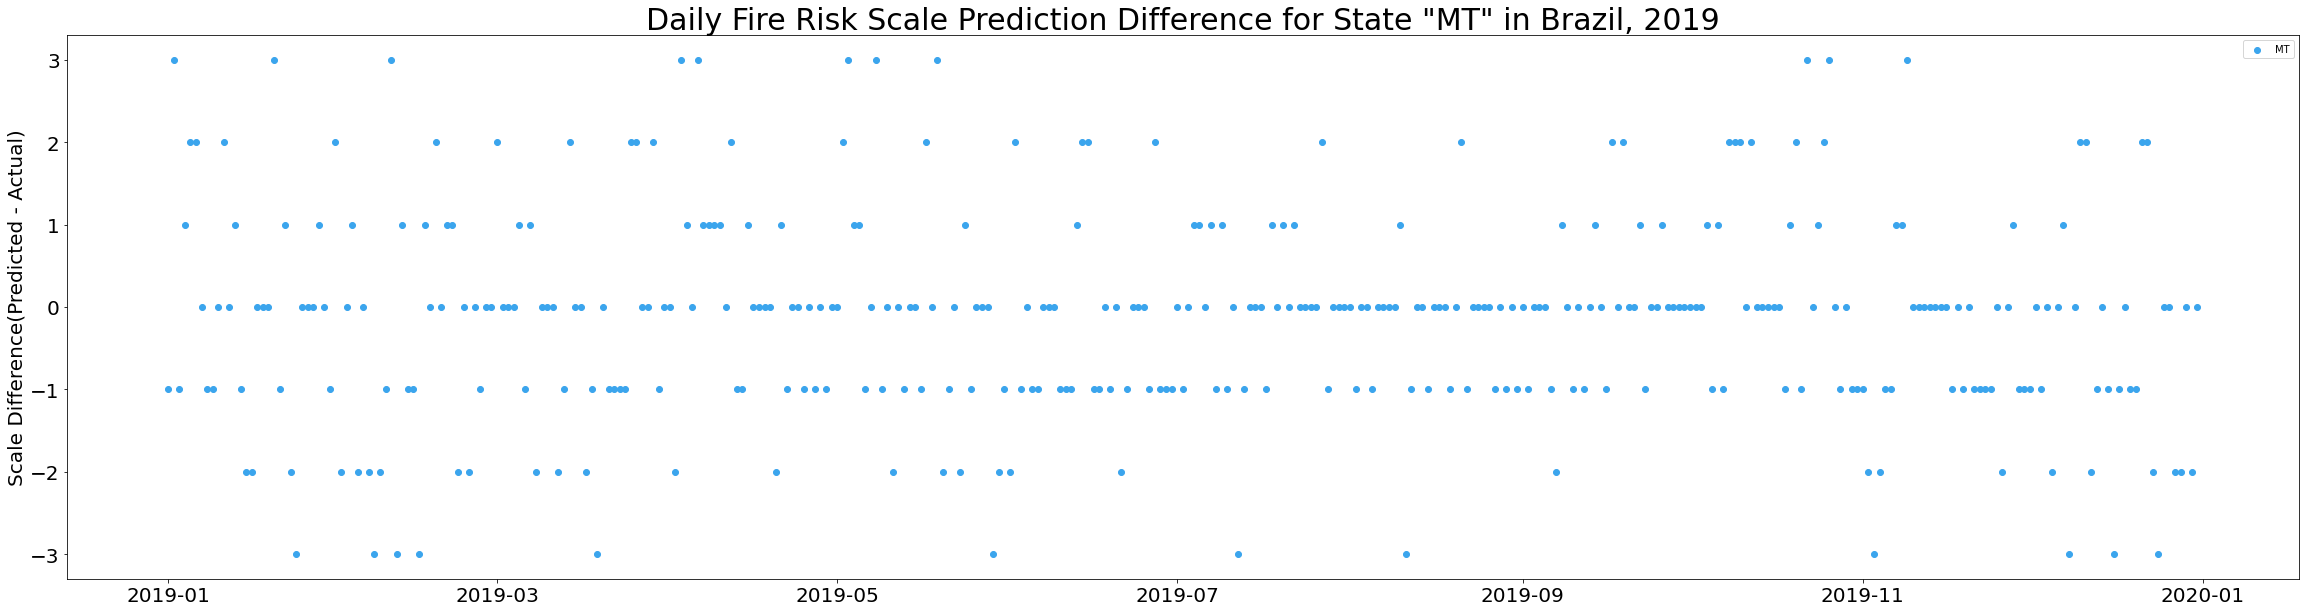

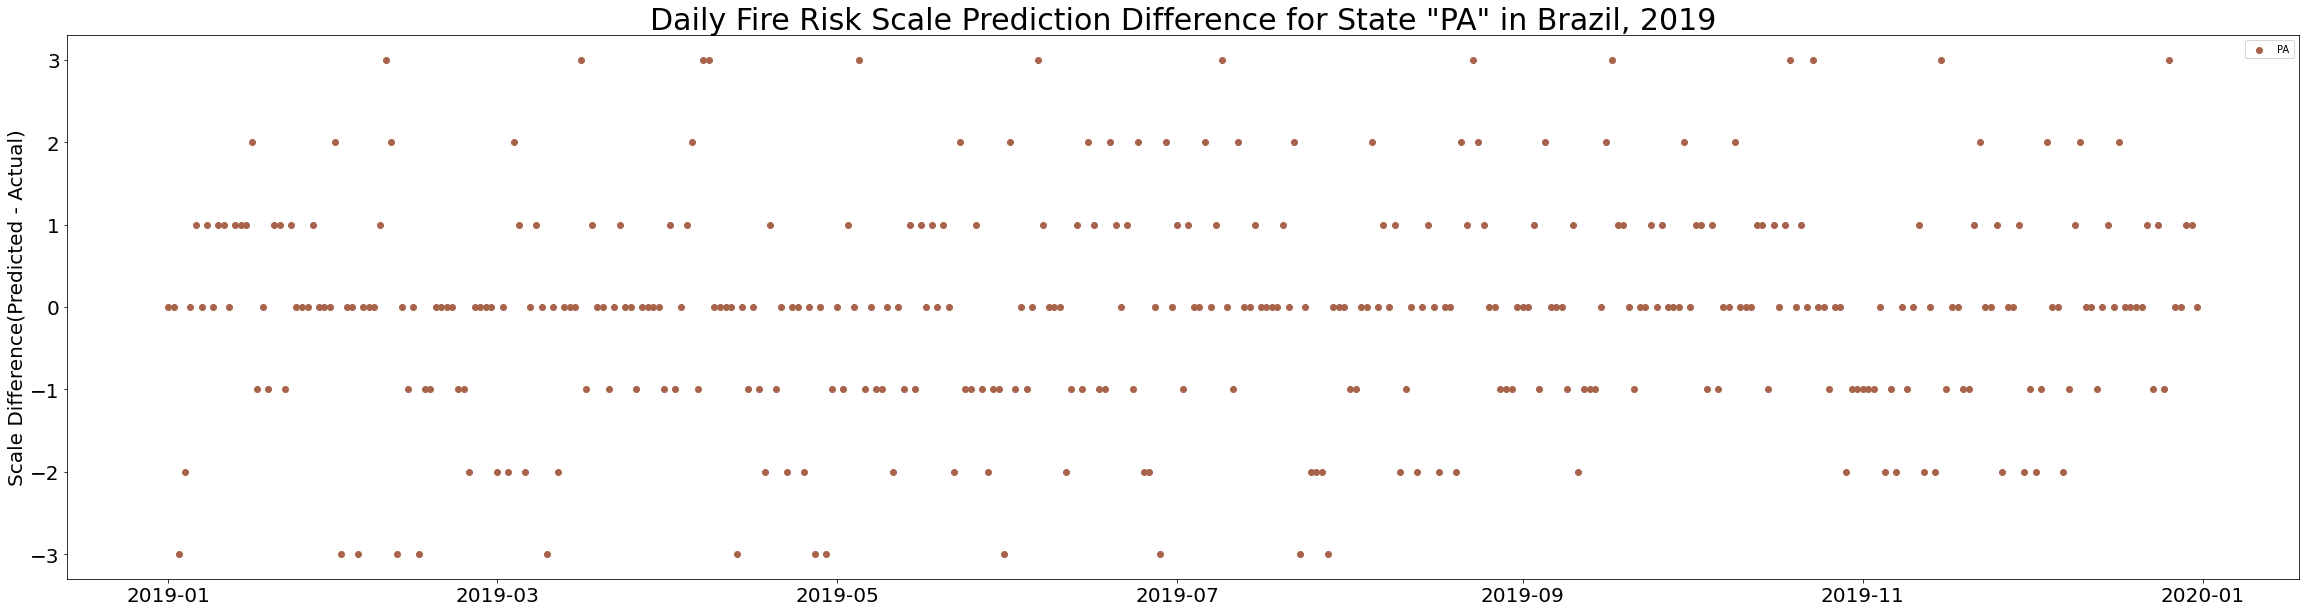

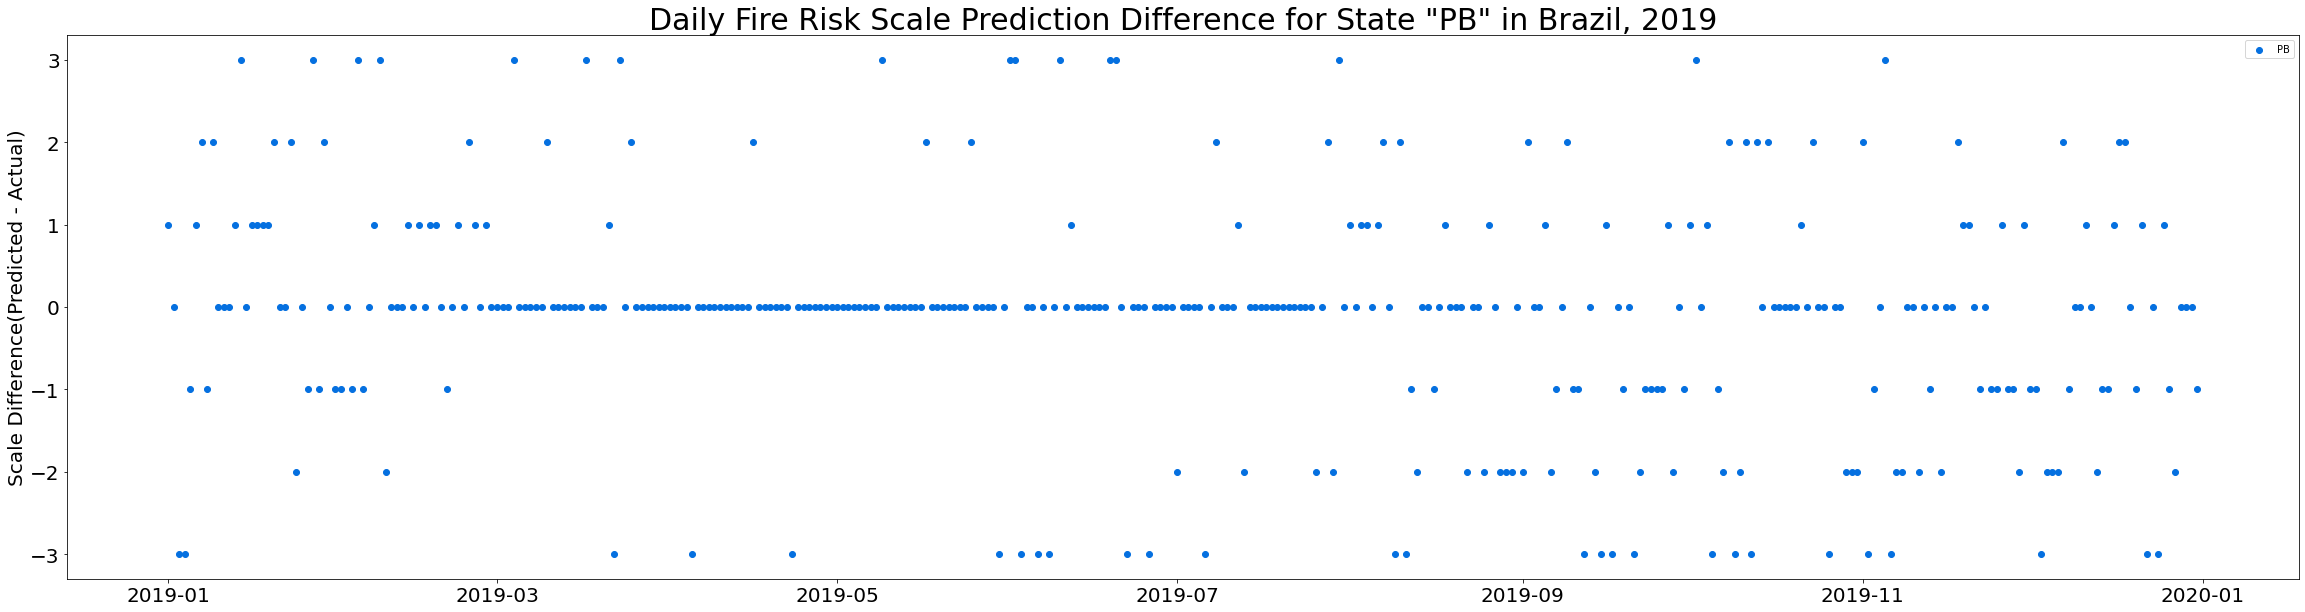

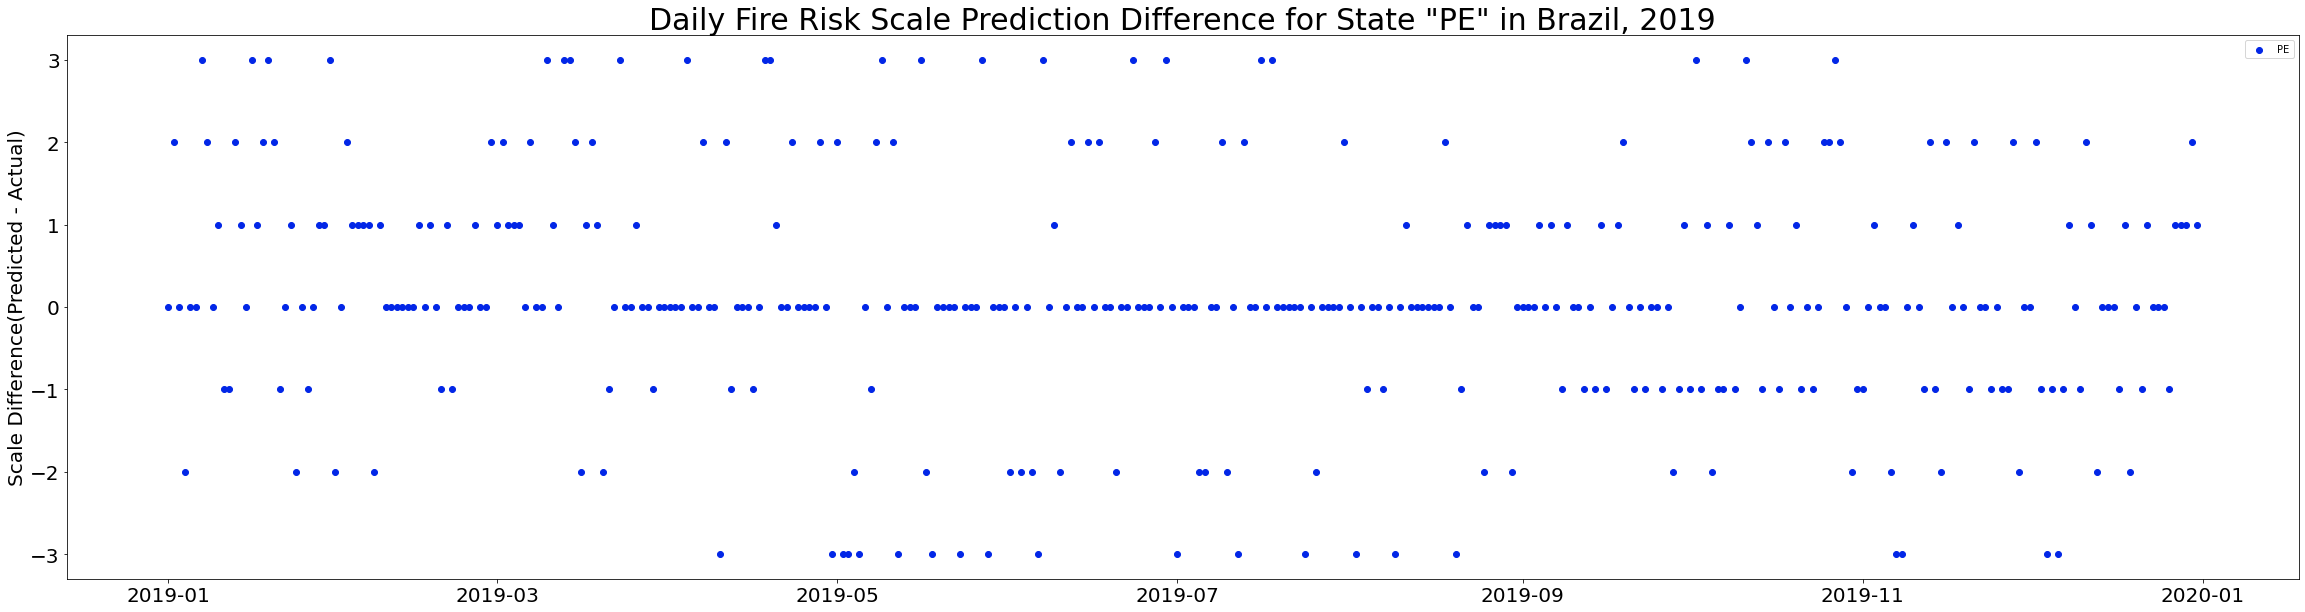

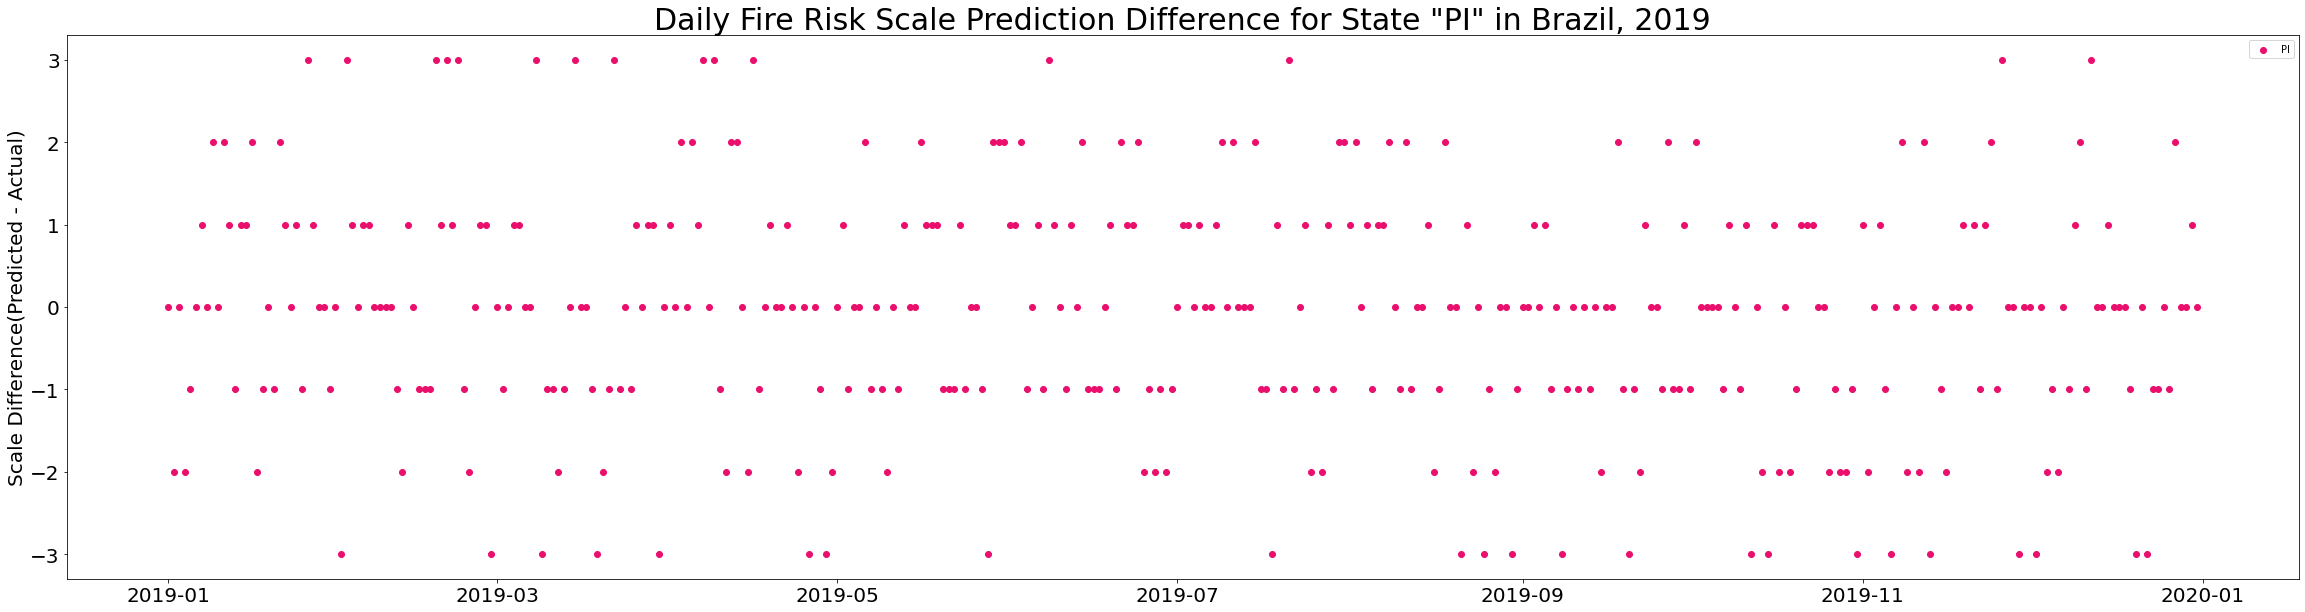

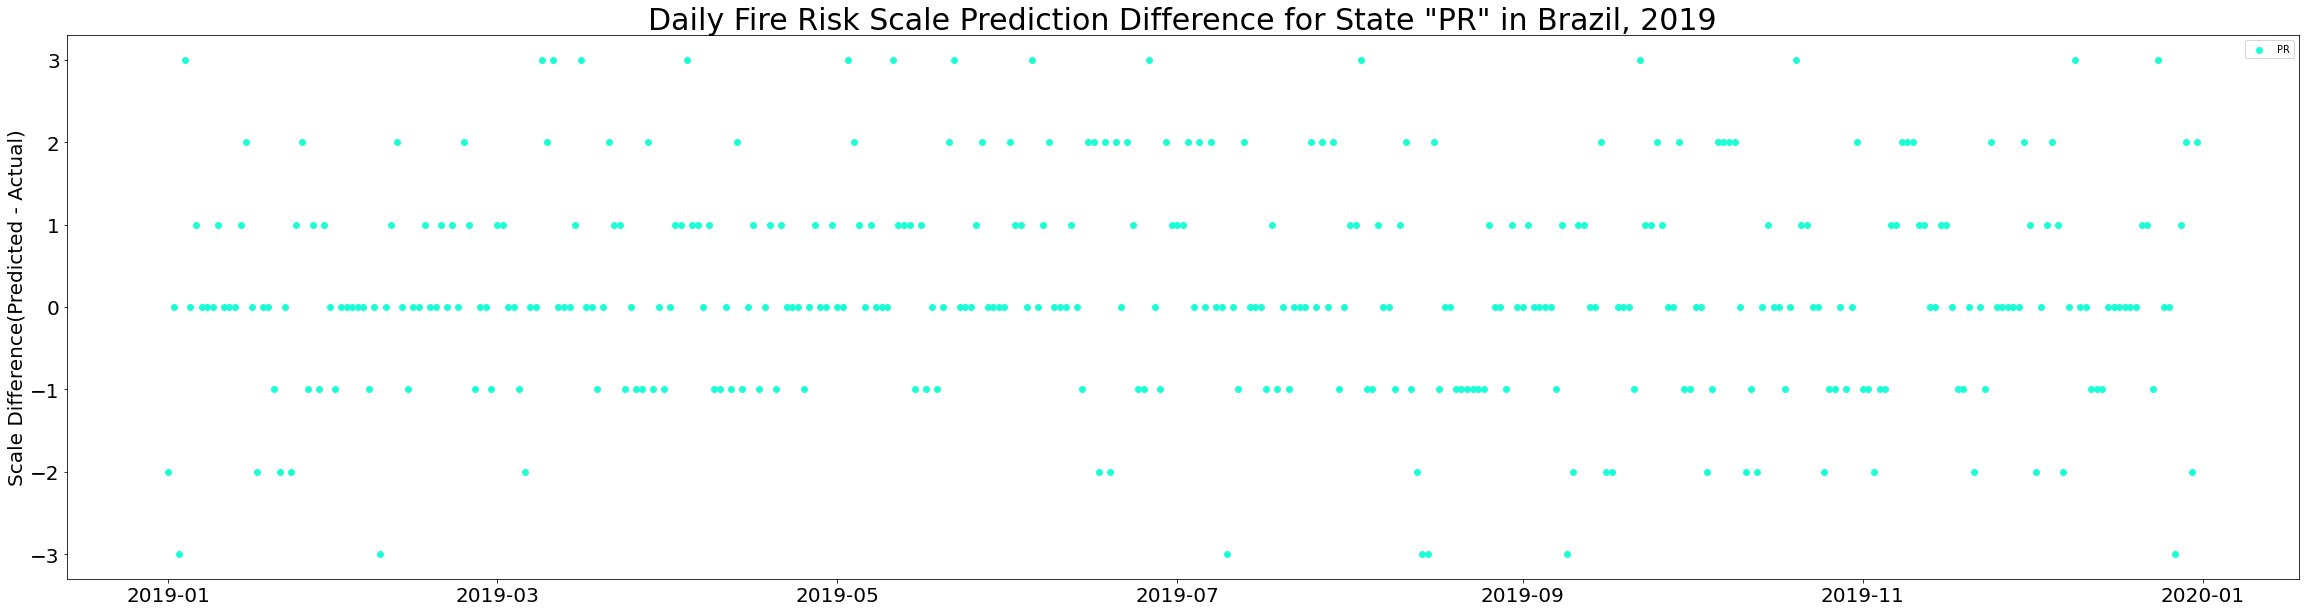

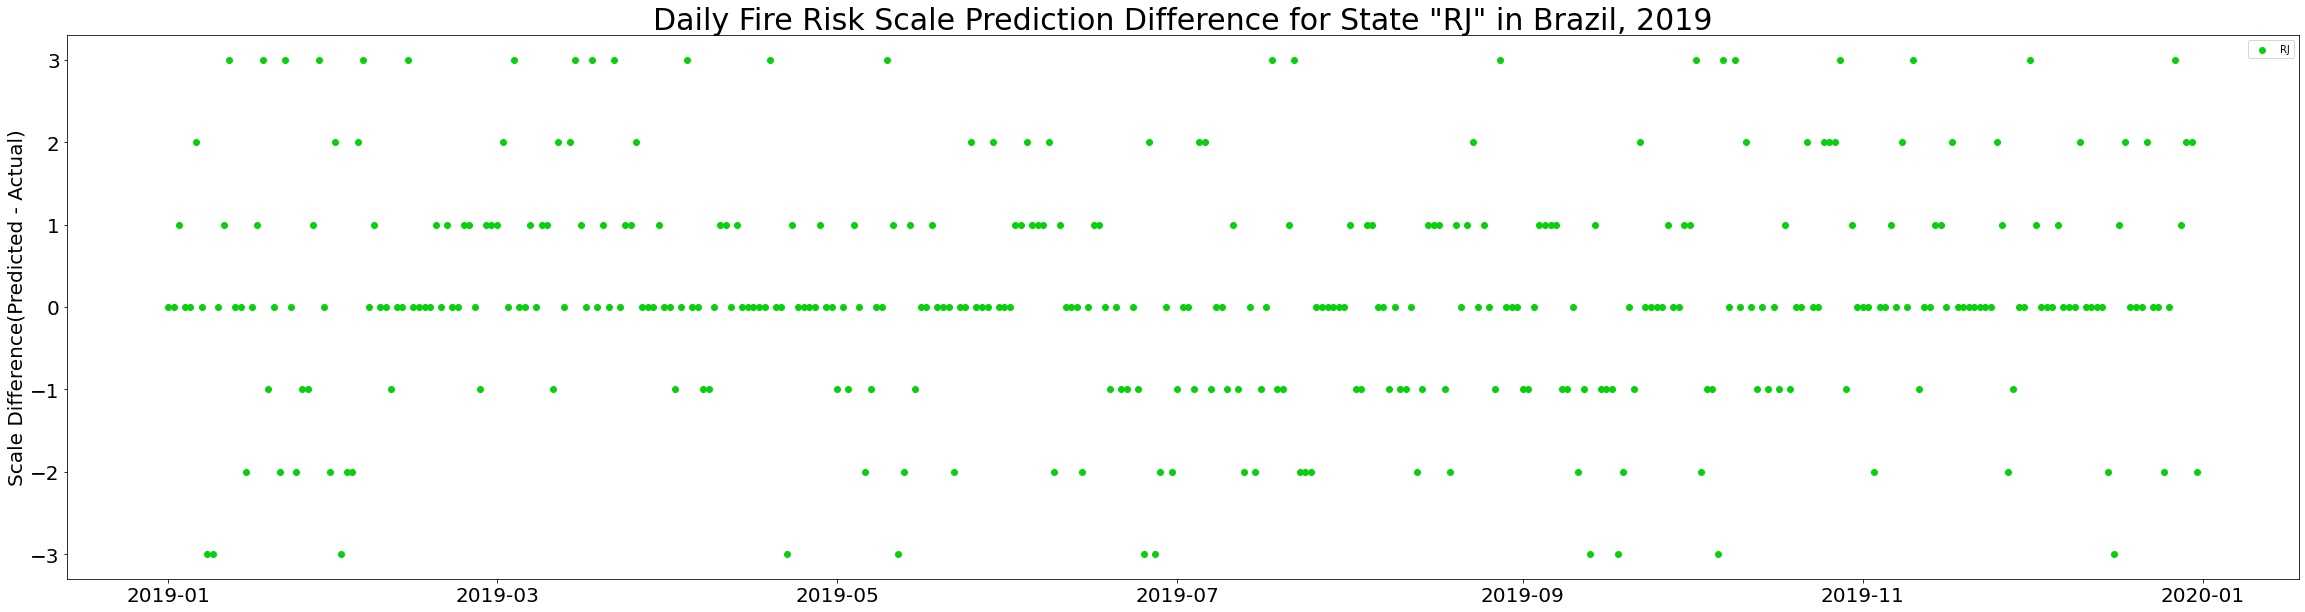

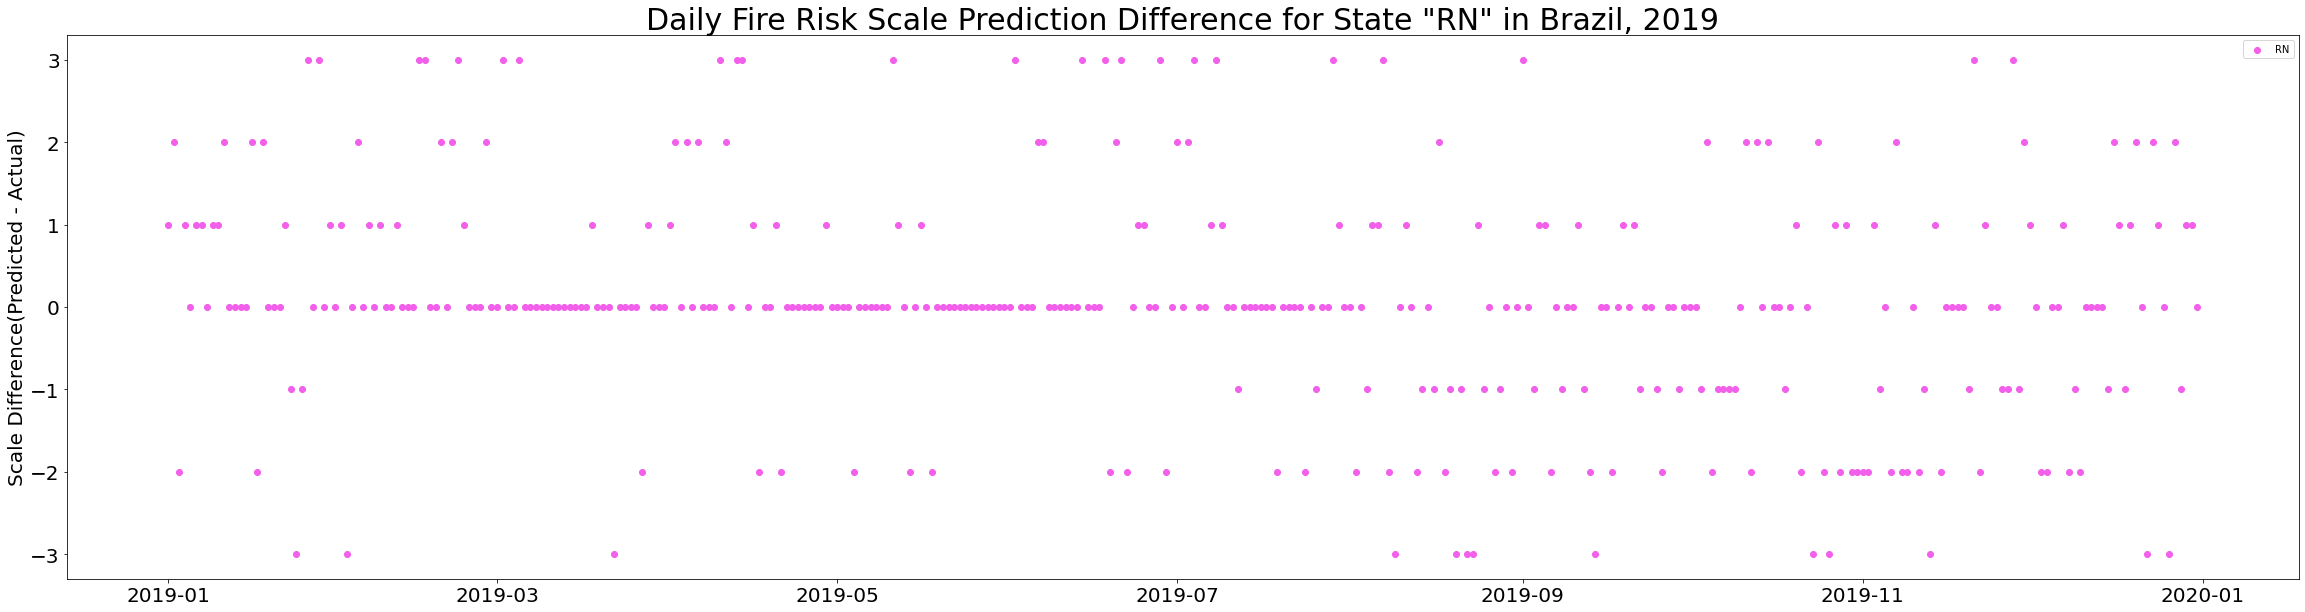

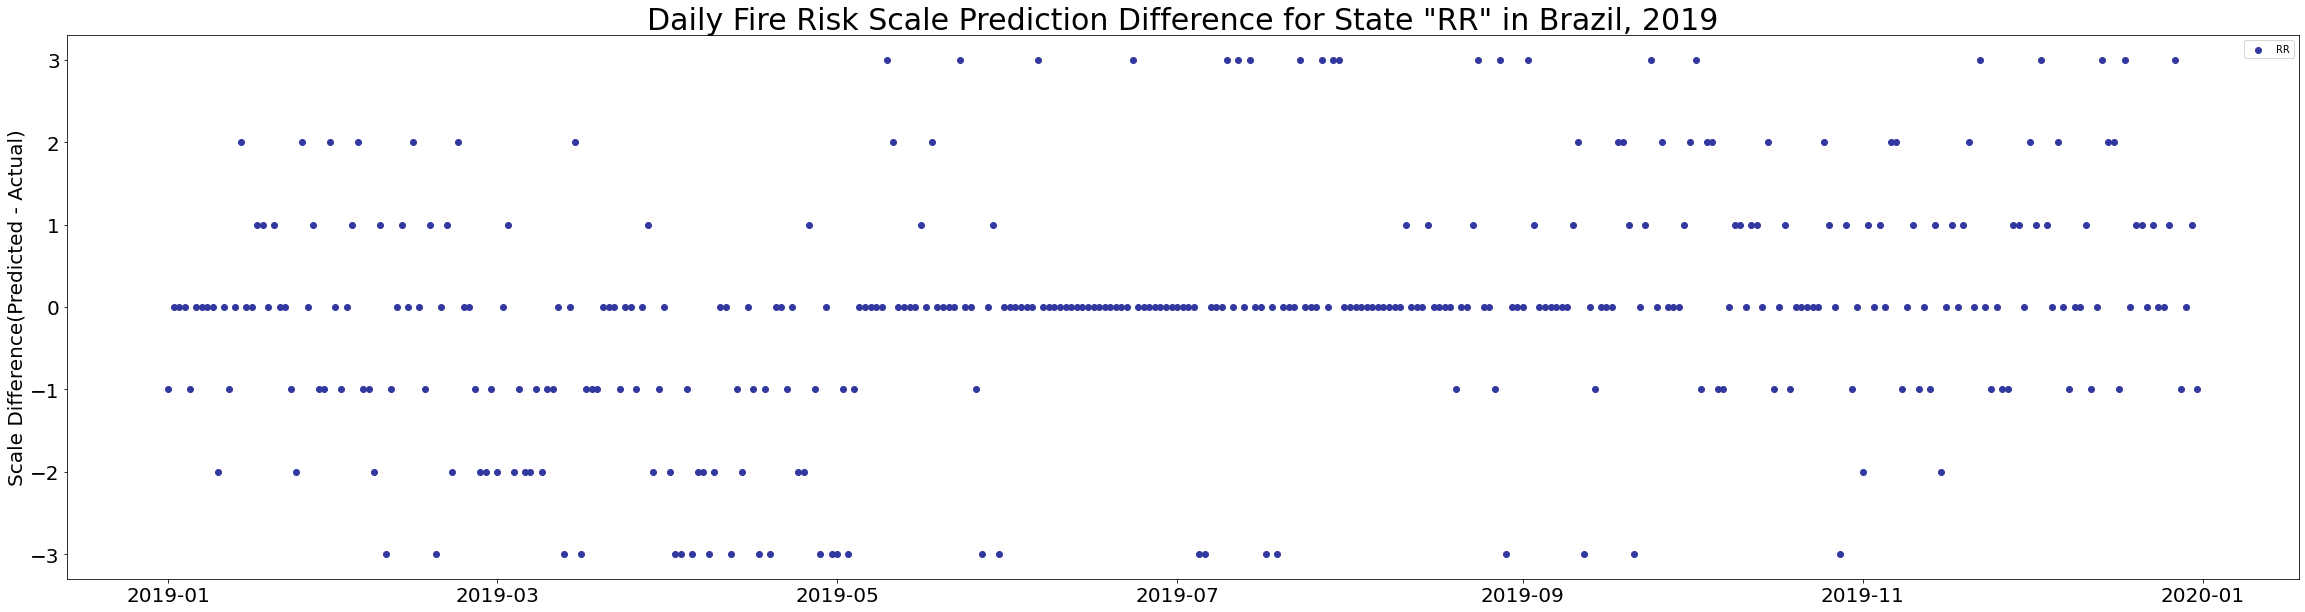

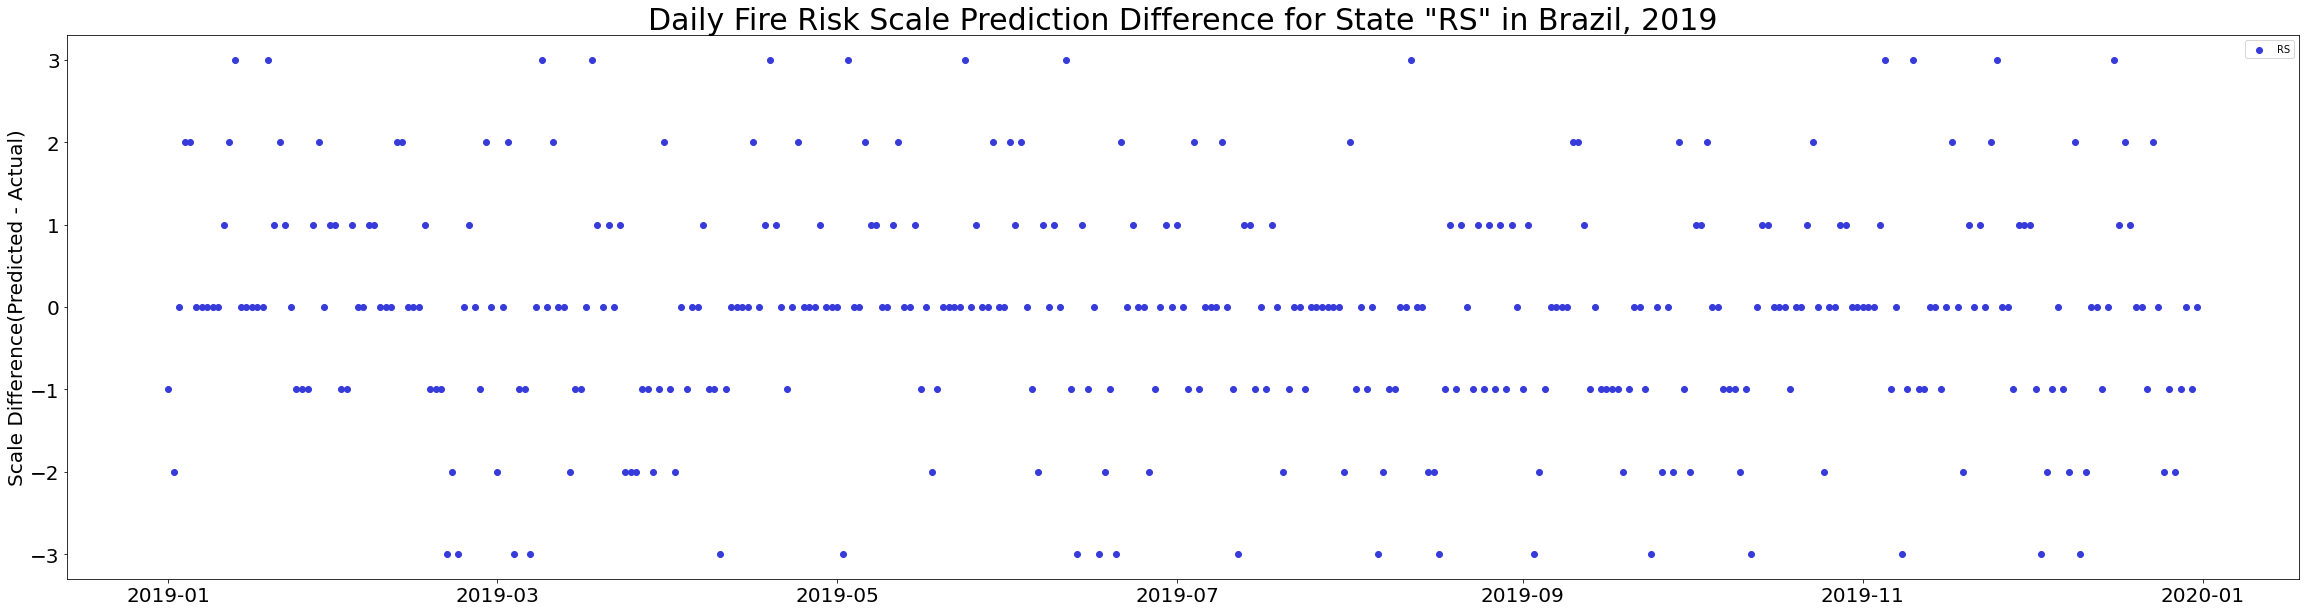

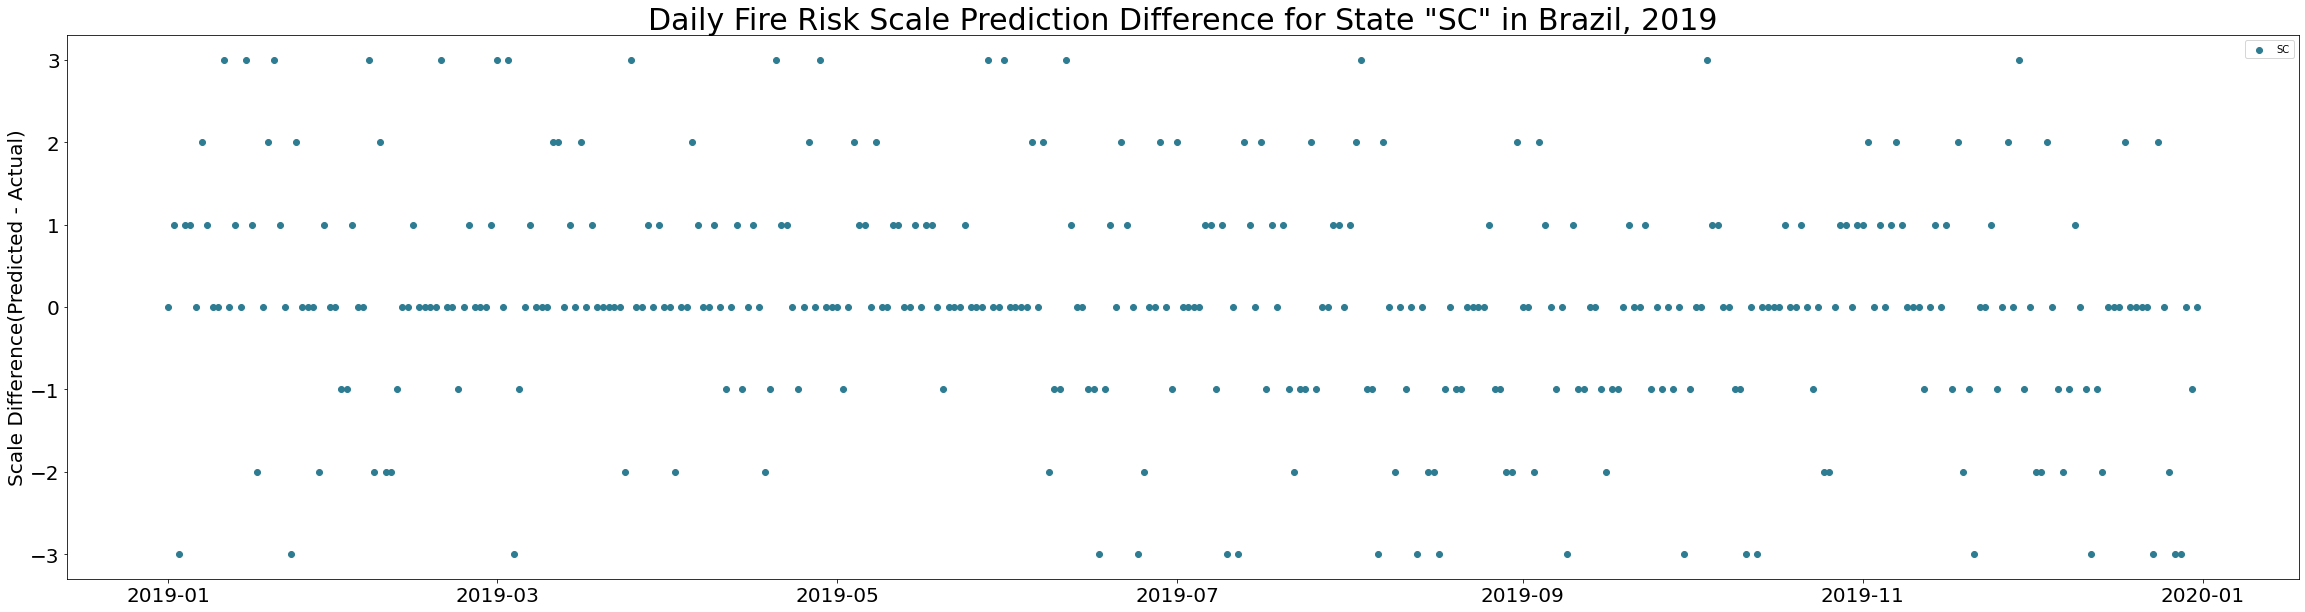

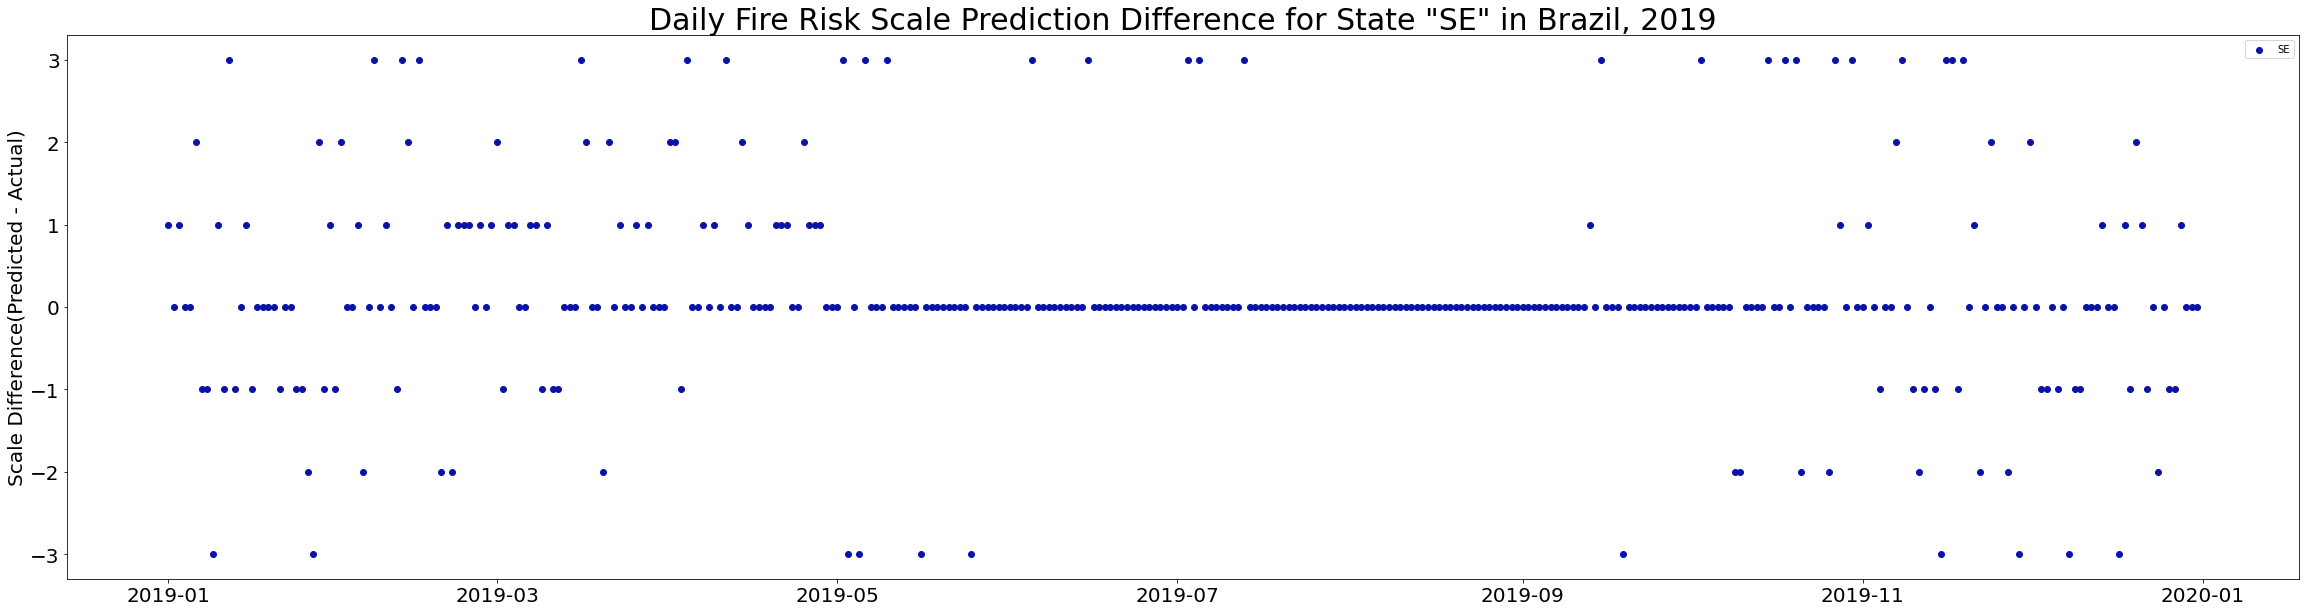

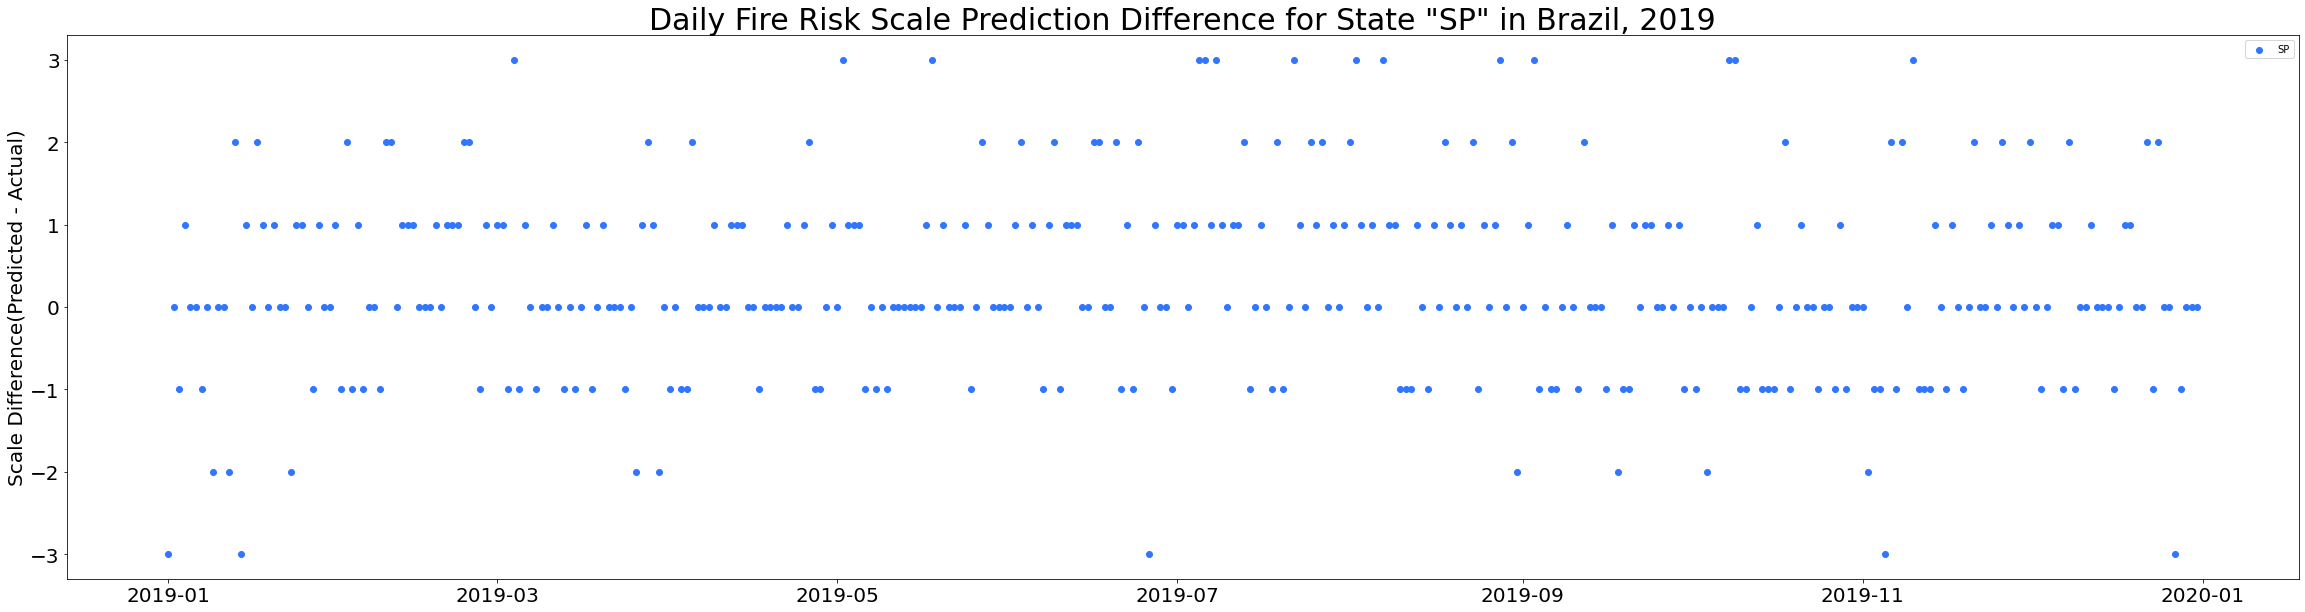

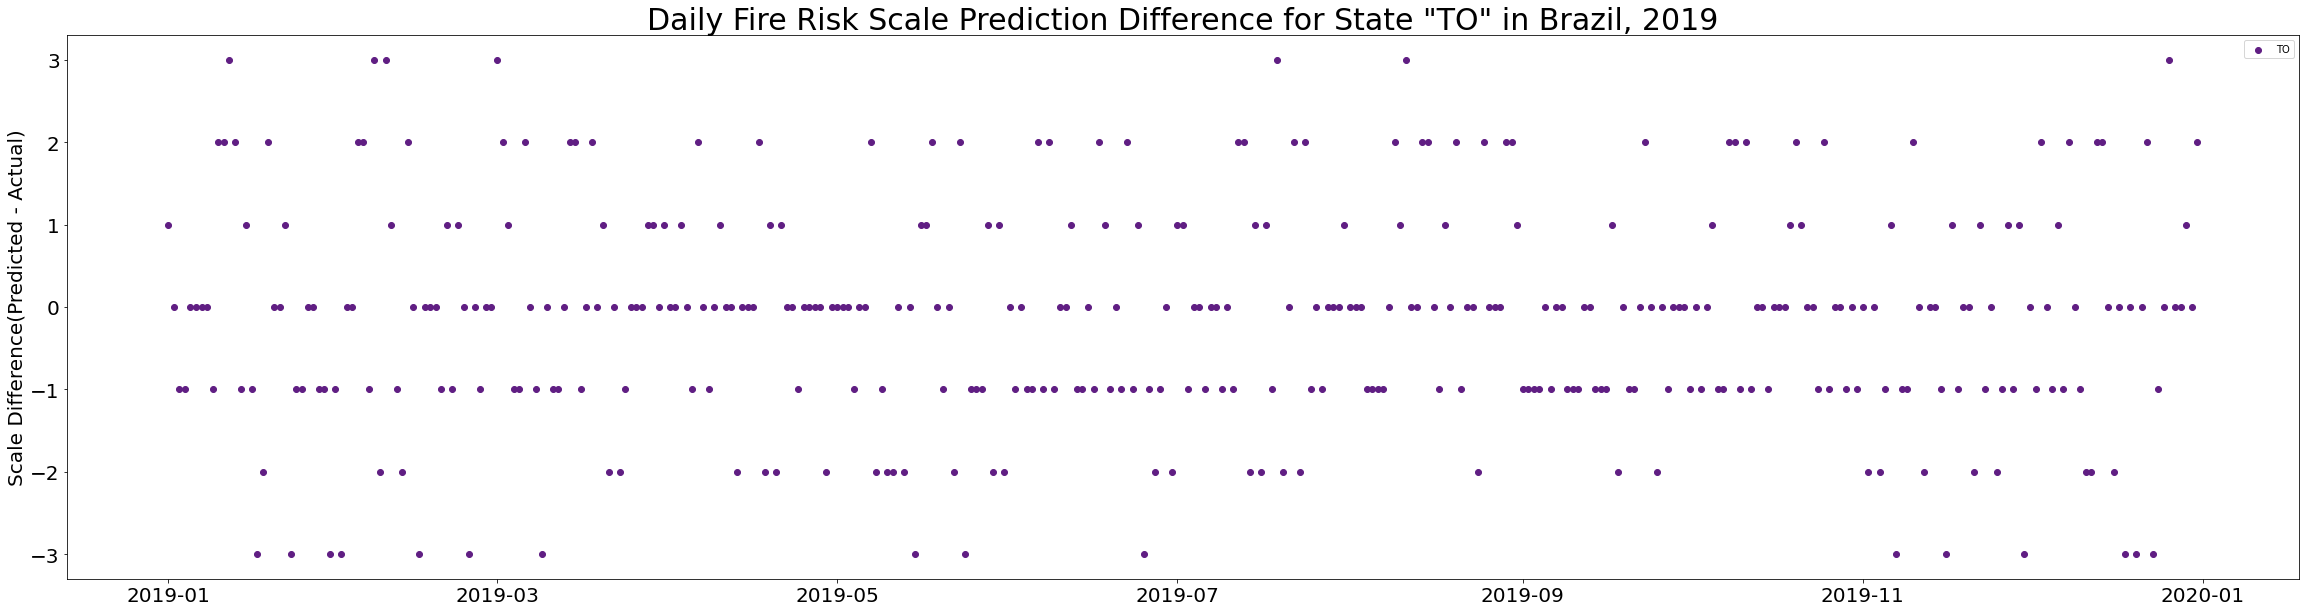

In [ ]:
import random
for i in statelist:
    ax = plt.figure(figsize=(40,10))
    plt.scatter(data_test['Date'].unique() ,data_pred['Scale_prediction'].loc[data_test['State']==i]-data_test['Scale'].loc[data_test['State']==i],c=(random.random(), random.random(), random.random()), alpha=1, label=i)
    #plt.scatter(data_pred['Date'].unique() ,data_pred['Scale_prediction'].loc[data_test['State']==statelist[2]], alpha=0.3, label=i)
    plt.legend(loc=1)
    plt.title(f'Daily Fire Risk Scale Prediction Difference for State "{i}" in Brazil, 2019', fontsize=30)
    plt.ylabel('Scale Difference(Predicted - Actual)', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.show()
    ax.savefig(f'/content/drive/Shareddrives/BNCS411_Final_Project/Scale_Diff_{i}_2019.pdf')

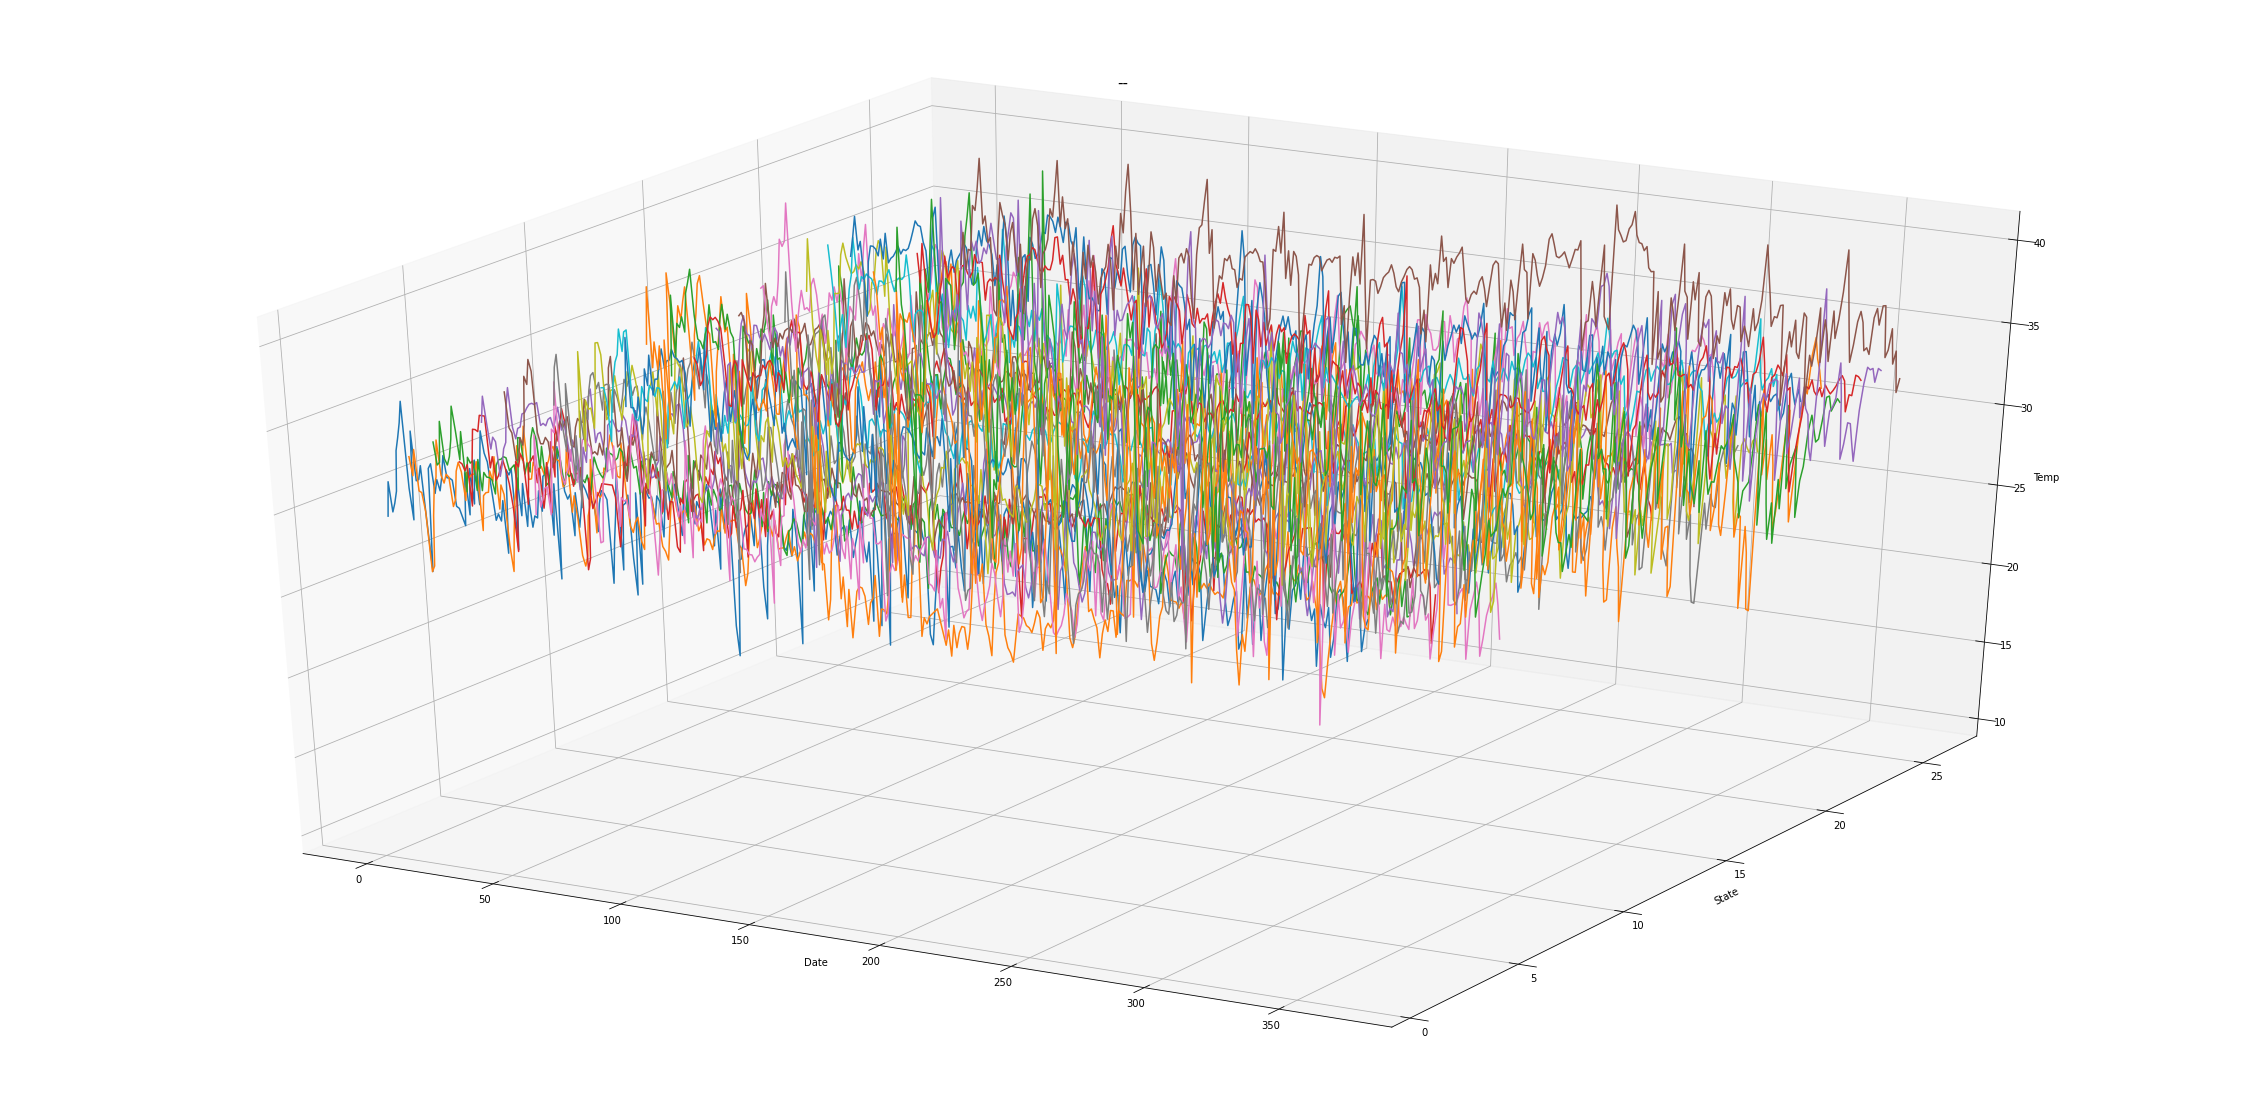

In [ ]:
fig = plt.figure(figsize=(40,20))
ax = fig.gca(projection = '3d')
ax.set_title('--', size=15)
date = list(data_test['Date'].astype(str).unique())
ax.set_xlabel('Date')
ax.set_ylabel('State')
ax.set_zlabel('Temp')
for i in statelist:
    ax.plot([j for j in range(1,366)],list(data_test['StateNr'].loc[data_test['State']==i].unique())*365, data_test['MaxTemp'].loc[data_test['State']==i])